<a id="table_of_contents"></a>
# Содержание

1. [Декомпозиция задачи](#decomposition)
2. [Загрузка библиотек и данных](#start)
3. [Подготовка данных к анализу](#preprocessing)
3. [Исследовательский анализ данных (EDA)¶](#analysis)  
    * [Общий анализ данных о действиях пользователей](#analysis_1) 
    * [Анализ сессий¶](#analysis_2)
    * [Конверсия сессий](#analysis_3)
    * [Анализ воронок, по которым пользователи доходят до просмотра контактов, сравнение их по конверсии и времени до совершения целевого действия](#analysis_4)
    * [Анализ действий самого активного пользователя](#analysis_5)
    * [Анализ действий группы активных пользователей](#analysis_6)
    * [Анализ действий группы базовых пользоватлей](#analysis_7)
    * [Анализ действий пользователей, не совершивших целевое действие](#analysis_8)
    * [Анализ действий целевой группы по дням недели](#analysis_9)
    * [Метрика DAU](#analysis_10)
    * [Анализ источников](#analysis_11)
    * [Выводы](#analysis_12)
4. [Анализ влияния событий на совершение целевого события](#target_event)
    * [Матрица корреляций](#corr)
    * [Построение модели прогнозирования совершения целевого действия](#ML)
5. [Проверка статистических гипотез](#stats)  
    * [Гипотеза № 1](#stats_1)
    * [Гипотеза № 2](#stats_2)
6. [Выводы и рекомендации](#conclusions)

# Мобильные приложения — Анализ поведения пользователей в мобильном приложении

**Мобильное приложение** - "Ненужные вещи".

**Функционал** - площадка объявлений, на которой осуществляются договоренности по продаже личных ("ненужных") вещей между частными лицами через размещение объявлений.

**ЗАДАЧА ПРОЕКТА:**

На основании данных, представленных в 2-х датасетах, о событиях, совершенных в мобильном приложении начиная с 07.10.2019:

**файл mobile_soures.csv**

* userId — идентификатор пользователя

* source — источник, с которого пользователь установил приложение

**файл mobile_dataset.csv:**

* event.time — время совершения

* user.id — идентификатор пользователя

* event.name — действие пользователя

**виды действий:**

* advert_open — открыл карточки объявления

* photos_show — просмотрел фотографий в объявлении

* tips_show — увидел рекомендованные объявления

* tips_click — кликнул по рекомендованному объявлению

* contacts_show и show_contacts — посмотрел номер телефона

* contacts_call — позвонил по номеру из объявления

* map — открыл карту объявлений

* search_1 — search_7 — разные действия, связанные с поиском по сайту

* favorites_add — добавил объявление в избранное

**Проанализировать** связь целевого события - просмотр контактов - и других действий пользователей.

**Оценить**, какие действия чаще совершают те пользователи, которые просматривают контакты.

**Произвести** проверку статистических гипотез.

**Подготовить выводы и рекомендации.**

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="decomposition"></a>
## Декомпозиция задачи

1. Загрузить необходимые библиотеки и данные.
2. Подготовить данные к анализу, а именно:
    - проверить регистры, корректность записей и названий (преобразовать в случае необходимости);
    - проверить типы данных (преобразовать в случае необходимости);
    - проверить пропущенные значения (преобразовать в случае необходимости);
    - проверить данные на наличие дубликатов (преобразовать в случае необходимости);
    - проверить минимальные и максимальные значения, выявить аномалии (преобразовать в случае необходимости).
3. Провести исследовательский анализ данных (EDA), а именно:
    - провести общий анализ данных о действиях пользователей;
    - провести анализ сессий (установить длительность сессий, рассчитать конверсию сессий в целевое действие);
    - выделить вороноки, по которым пользователи доходят до просмотра контактов, сравнить их по конверсии и времени до совершения целевого действия;
    - воспроизвести модель поведения активных пользователей по количеству целевых действий в приложении (набор действий, порядок выполнения действий, периодичность, длительность сессий, источник установки приложения), построить график;
    - воспроизвести модель поведения базовых пользователей в приложении (набор действий, порядок выполнения действий, периодичность, длительность сессий, источник установки приложения), построить графики;
    - воспроизвести модель поведения нецелевых пользователей, которые не совершили целевое действие;
    - изучить распределение действий по дням недели;
    - проверить метрику DAU;
    - проанализироать распределение пользователей среди источников.         
4. Провести анализ влияния событий на совершение целевого события, а именно:
    - изучить силу взяимосвязей между данными / действиями;
    - выявить корреляцию между действиями, построить тепловую карту;
    - построить модель прогнозирования совершения целевого действия;
    - сделать предположение какие действия являются ключевыми на основе оценок модели.
5. Провести проверку статистических гипотез:
    - проверить гипотезу различия конверсии в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex, и пользователя, совершившими установки, из источника google;
    - проверить гипотезу различия конверсии в contacs_call и favorites_add между теми пользователями, которые совершили действия tips_show - tips_click и пользователями, которые не совершали действие tips_click.
6. На основании проведенного исследования создать презентацию и дашборд.

# Материалы:

**презентация:** https://disk.yandex.ru/d/fLdp6emkiiI5AA

**дашборд:** https://public.tableau.com/views/dash_mobile_application/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="start"></a> 
## Загрузка библиотек и данных

In [1]:
# загружаем библиотеки,
# подготавливаем рабочее пространство

import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date, time
import math as mth
import seaborn as sns


import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

import scipy.stats as stats
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 110)

import warnings
warnings.filterwarnings('ignore')

Загрузим файлы. Изучим данные с помощью метода info(). Выведем первые строки таблицы методом head(), чтобы познакомиться с данными.

In [2]:
# загружаем данные датасета mobile_dataset.csv,
# выводим информацию о датасете,
# выводим случайные 5 строк таблицы

data_dataset = pd.read_csv('/datasets/mobile_dataset.csv')
data_dataset.info()
display(data_dataset.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


event.time   event.name  \
39071  2019-10-22 19:54:57.347389  photos_show   
26189  2019-10-17 19:24:04.603963     search_6   
71085  2019-11-02 21:47:56.350077  photos_show   
13125  2019-10-12 22:56:55.331410  photos_show   
62392  2019-10-30 14:59:06.047500    tips_show   

                                    user.id  
39071  56700b1e-902d-4b49-b4e8-4e5395db79bc  
26189  a8dc7711-68e1-44a2-a07c-525f1982b753  
71085  e13f9f32-7ae3-4204-8d60-898db040bcfc  
13125  97d1107f-1d9c-4086-b2d9-83985afecca3  
62392  358ac166-ab01-4660-b192-b3e05ca0b429

In [3]:
# загружаем данные датасета mobile_soures.csv,
# выводим информацию о датасете,
# выводим случайные 5 строк таблицы

data_sources = pd.read_csv('/datasets/mobile_soures.csv')
data_sources.info()
display(data_sources.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


userId  source
2461  1b8639b3-0985-404e-b270-f71f2fc559d6  google
3525  2ac7795b-88dc-47ea-8086-aa1facdfc701  yandex
108   6fd56a18-0548-4330-acd9-de19b8e7915e  yandex
3752  62addfe0-22b7-4924-a823-112b17cc6164  yandex
3936  0f3c5072-85f6-4408-9e5e-355acbc3226d  yandex

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="preprocessing"></a> 
## Подготовка данных к анализу

In [4]:
# приводим названия колонок в обоих датасетах к единому стандарту написания

data_dataset.columns = data_dataset.columns.str.replace(".", "_", regex=True)
print(data_dataset.columns)
print()

data_sources.columns = data_sources.columns.str.replace("userId", "user_id")
print(data_sources.columns)

Index(['event_time', 'event_name', 'user_id'], dtype='object')

Index(['user_id', 'source'], dtype='object')


In [5]:
# объединяем датасеты по user_id,
# выводим случайные 5 строк таблицы

data = data_dataset.merge(data_sources, on=['user_id'], how='left')
display(data.sample(5))

event_time   event_name  \
21862  2019-10-16 09:06:58.891398    tips_show   
34966  2019-10-21 12:49:52.037016  advert_open   
28860  2019-10-18 19:04:50.643287    tips_show   
19517  2019-10-15 12:13:16.680339  photos_show   
1596   2019-10-07 19:21:48.039213  photos_show   

                                    user_id  source  
21862  dfdfc2e2-0e42-4714-af5f-051d327355b9  google  
34966  83fec0d5-59c5-4563-a07c-1739f359bc21   other  
28860  22421bcf-4abf-4a84-9609-f97d49ffdf34  yandex  
19517  7ede9292-2c58-4e17-a258-7073aa33933a  yandex  
1596   dc5abd47-f8e4-4dac-93fe-2ff5a19f4bbd  google

In [6]:
# приводим значения колонки event_time к типу date_time,
# округляем значение времени до секунд,
# проверяем типы данных

data['event_time']=pd.to_datetime(data['event_time'], format ='%Y-%m-%d %H:%M:%S')
data['event_time'] = data['event_time'].dt.round('S')
display(data.dtypes)

event_time    datetime64[ns]
event_name            object
user_id               object
source                object
dtype: object

In [7]:
# добавляем колонку event_date

data['event_date'] = pd.DatetimeIndex(data['event_time']).date.astype('datetime64[ns]')

In [8]:
# добавляем колонку week_day

data['week_day'] = data['event_date'].dt.weekday

In [9]:
# выводим 5 случайных строк таблицы

display(data.sample(5))

event_time     event_name  \
8978  2019-10-10 19:39:23            map   
18226 2019-10-14 20:28:17      tips_show   
58364 2019-10-29 09:40:45      tips_show   
18974 2019-10-15 02:25:48  favorites_add   
54764 2019-10-27 23:51:33       search_1   

                                    user_id  source event_date  week_day  
8978   e16800cb-391c-420b-b490-23847dda14e3   other 2019-10-10         3  
18226  2ce6c413-30d2-4d26-8b83-0bd21bc66546  yandex 2019-10-14         0  
58364  5dacd981-d128-4f3e-a95c-f506a3113bbf   other 2019-10-29         1  
18974  bdd67a79-fbbe-40b0-a8f6-d8fa5a782a39  yandex 2019-10-15         1  
54764  c78b6cb3-aa76-4c43-aee2-933c707dbe73   other 2019-10-27         6

In [10]:
# проверяем наличие пропущенных значений

print('Количество пропущенных значений в таблице:\n', data.isnull().sum())

Количество пропущенных значений в таблице:
 event_time    0
event_name    0
user_id       0
source        0
event_date    0
week_day      0
dtype: int64


In [11]:
# проверяем наличие дубликатов в таблице

print('Количество дубликатов в таблице:', data.duplicated().sum())

Количество дубликатов в таблице: 1118


In [12]:
# выводим задублированные строки

data_dupl_lst = data.duplicated(keep=False).to_frame().rename(columns={0:'dupl'})
data_dupl = data_dupl_lst[data_dupl_lst['dupl'] == True]
display(data[data.index.isin(data_dupl.index)].sort_values(by='user_id', ascending = True))

event_time   event_name                               user_id  \
39297 2019-10-22 20:49:43  photos_show  00753c79-ea81-4456-acd0-a47a23ca2fb9   
39296 2019-10-22 20:49:43  photos_show  00753c79-ea81-4456-acd0-a47a23ca2fb9   
37905 2019-10-22 13:02:27          map  007d031d-5018-4e02-b7ee-72a30609173f   
37906 2019-10-22 13:02:27          map  007d031d-5018-4e02-b7ee-72a30609173f   
8112  2019-10-10 14:46:37    tips_show  017c6afc-965d-4c94-84ee-f0e326998e30   
...                   ...          ...                                   ...   
18244 2019-10-14 20:33:50  photos_show  fc546918-70e2-4a04-a9a2-bc358f1db5c9   
1931  2019-10-07 20:32:50  photos_show  ffc01466-fdb1-4460-ae94-e800f52eb136   
1932  2019-10-07 20:32:50  photos_show  ffc01466-fdb1-4460-ae94-e800f52eb136   
54109 2019-10-27 20:00:18    tips_show  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   
54110 2019-10-27 20:00:18    tips_show  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   

       source event_date  week_day  
39297  yandex 2019-10-22         1  
39296  yandex 2019-10-22         1  
37905  yandex 2019-10-22         1  
37906  yandex 2019-10-22         1  
8112    other 2019-10-10         3  
...       ...        ...       ...  
18244  yandex 2019-10-14         0  
1931   yandex 2019-10-07         0  
1932   yandex 2019-10-07         0  
54109  google 2019-10-27         6  
54110  google 2019-10-27         6  

[2039 rows x 6 columns]

In [13]:
# удаляем дубликаты,
# делаем повторную проверку

data = data.drop_duplicates().reset_index(drop=True)
print('Количество дубликатов в таблице после удаления:',data.duplicated().sum())
print()
print('Количество записей в таблице после удаления дубликатов:',data.shape)

Количество дубликатов в таблице после удаления: 0

Количество записей в таблице после удаления дубликатов: (73079, 6)


In [14]:
# проверяем минимальные и максимальные значения колонки event_time

print('Минимальная дата события: {}, максимальная дата события: {}'.format(data['event_time'].min(), data['event_time'].max()))

Минимальная дата события: 2019-10-07 00:00:00, максимальная дата события: 2019-11-03 23:58:13


In [15]:
# проверяем кол-во уникальных значений в колонке event_name

print(data.groupby('event_name')['user_id'].count().sort_values(ascending=False))

event_name
tips_show        39892
photos_show       9372
advert_open       6145
contacts_show     4302
map               3760
search_1          3489
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      538
search_3           521
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: user_id, dtype: int64


In [16]:
# выводим 5 случайных примеров записи действий contacts_show и show_contacts

display(data[data['event_name'] == 'contacts_show'].sample(5))
display(data[data['event_name'] == 'show_contacts'].sample(5))

event_time     event_name  \
36152 2019-10-21 21:40:15  contacts_show   
49453 2019-10-26 16:37:46  contacts_show   
22767 2019-10-16 15:58:09  contacts_show   
63585 2019-10-31 11:04:35  contacts_show   
56314 2019-10-28 19:47:31  contacts_show   

                                    user_id  source event_date  week_day  
36152  c88258a2-2718-4f38-a129-49e17010fdc5  google 2019-10-21         0  
49453  96394e05-d618-4ca3-96c1-049b51f3a4c8   other 2019-10-26         5  
22767  0a59892f-3578-484b-af84-eb3b2298fb8c  yandex 2019-10-16         2  
63585  293d3c68-6c14-45ee-8a30-6d9f16b55b6f  yandex 2019-10-31         3  
56314  8a981aa3-6fe7-456d-a175-dd4275874095  yandex 2019-10-28         0

event_time     event_name  \
63854 2019-10-31 12:16:44  show_contacts   
63845 2019-10-31 12:15:52  show_contacts   
66785 2019-11-01 13:38:42  show_contacts   
66525 2019-11-01 12:19:51  show_contacts   
66348 2019-11-01 11:31:59  show_contacts   

                                    user_id  source event_date  week_day  
63854  f8502cbc-9322-46eb-bc9f-8f261a94c1a2  yandex 2019-10-31         3  
63845  f8502cbc-9322-46eb-bc9f-8f261a94c1a2  yandex 2019-10-31         3  
66785  e38cb669-7335-4d56-9de5-c8d5d2f13fd3  google 2019-11-01         4  
66525  e38cb669-7335-4d56-9de5-c8d5d2f13fd3  google 2019-11-01         4  
66348  e38cb669-7335-4d56-9de5-c8d5d2f13fd3  google 2019-11-01         4

In [17]:
# объединяем данные по действиям contacts_show и show_contacts

data['event_name'] = data['event_name'].replace('show_contacts', 'contacts_show')
print(data.groupby('event_name')['user_id'].count().sort_values(ascending=False))

event_name
tips_show        39892
photos_show       9372
advert_open       6145
contacts_show     4381
map               3760
search_1          3489
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      538
search_3           521
search_6           460
search_2           324
search_7           222
Name: user_id, dtype: int64


In [18]:
# выводим кол-во уникальных user_id

print('Количество уникальных клиентов:', data['user_id'].nunique())

Количество уникальных клиентов: 4293


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73079 entries, 0 to 73078
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73079 non-null  datetime64[ns]
 1   event_name  73079 non-null  object        
 2   user_id     73079 non-null  object        
 3   source      73079 non-null  object        
 4   event_date  73079 non-null  datetime64[ns]
 5   week_day    73079 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.3+ MB


**Выводы**

* данные предоставлены в 2-х датасетах
* датасет *mobile_dataset.csv* содержит 74 197 записей и 3 колонки, тип данных *object*
* датсет *mobile_soures.csv* содержит 4 293 записи и 2 колонки, тип данных *object*
* оба датасета содержат колонки с уникальным номером пользователя
* в качестве преобразования названия колонок приведены к единому стандарту написания
* произведено объединение датасетов по уникальному номера пользователя
* данные колонки *event_time* приведены к типу *datetime64[ns]*
* данные колонки *event_time* округлены до значения секунд
* добавлена колонка event_date, данные приведены к типу *datetime64[ns]*
* добавлена колонка week_day
* пропущенные значения не выявлены
* проверка на дубликаты выявила 1 118 задублированных записей; дубликаты удалены
* проверка минимальной и максимальной даты событий показала, что данные предоставлены за период с 7 октября 2019 г (00:00:00) по 3 ноября 2019 г (23:58:13) или 28 полных дней
* анализ данных по целевому действию *просмотр контактов*, записанных двумя разными способами, показал, что действия ничем не отличаются по содержанию; появление небольшого числа записей (79 vs 4 302) с зеркальным написанием скорее всего связано с выгрузкой данных из разных БД; данные объединены под единой записью *contacts_show*
* датасет содержит информацию о 4 293 уникальных пользователях.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis"></a> 
## Исследовательский анализ данных (EDA)

В связи с особенностью параметра tips_show, который показывается всем пользователям автоматически, то есть осуществление этого действия не зависит от воли пользователя, параметр не будет учитываться на данном этапе анализа.

<a id="analysis_1"></a> 
###  Общий анализ данных о действиях пользователей

Для получения статистической информации о количестве действий пользователей определим границы верхнего уса с помощью функции, а также создадим переменную, в которой сохраним  количество действий на уникального пользователя за период на всем датасете (при этом исключаем параметр tips_show).

In [20]:
# создаем функцию, определяющую границы верхнего уса

def upper_limit(data, column):
    quantiles = data[column].quantile([0.25, 0.5, 0.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    upper_limit = q3 + 1.5*(q3 - q1)
    return upper_limit

In [21]:
# создаем переменную, отражающую количество действий на уникального пользователя за период
# на всем датасете,
# исключаем параметр tips_show

data_all_users = data.pivot_table(index = 'user_id', columns = 'event_name', values = 'event_time', aggfunc = ('count'))\
.drop('tips_show', axis=1)
display(data_all_users.head(2))

event_name                            advert_open  contacts_call  \
user_id                                                            
0001b1d5-b74a-4cbf-aeb0-7df5947bf349          NaN            NaN   
00157779-810c-4498-9e05-a1e9e3cedf93          2.0            5.0   

event_name                            contacts_show  favorites_add  map  \
user_id                                                                   
0001b1d5-b74a-4cbf-aeb0-7df5947bf349            NaN            NaN  6.0   
00157779-810c-4498-9e05-a1e9e3cedf93           11.0            2.0  NaN   

event_name                            photos_show  search_1  search_2  \
user_id                                                                 
0001b1d5-b74a-4cbf-aeb0-7df5947bf349          NaN       NaN       NaN   
00157779-810c-4498-9e05-a1e9e3cedf93         33.0      18.0       NaN   

event_name                            search_3  search_4  search_5  search_6  \
user_id                                                                        
0001b1d5-b74a-4cbf-aeb0-7df5947bf349       NaN       NaN       NaN       NaN   
00157779-810c-4498-9e05-a1e9e3cedf93       NaN       NaN       NaN       NaN   

event_name                            search_7  tips_click  
user_id                                                     
0001b1d5-b74a-4cbf-aeb0-7df5947bf349       NaN         NaN  
00157779-810c-4498-9e05-a1e9e3cedf93       NaN         NaN

In [22]:
# выводим статистическую информацию по кол-ву действий всех пользователей

display(data_all_users.describe().T.sort_values(by='count', ascending=False))

count      mean        std  min  25%  50%  75%    max
event_name                                                           
map            1456.0  2.582418   4.613599  1.0  1.0  1.0  3.0   71.0
photos_show    1095.0  8.558904  13.002459  1.0  3.0  5.0  9.0  175.0
contacts_show   981.0  4.465851   8.982642  1.0  1.0  2.0  4.0  137.0
search_1        787.0  4.433291   6.003312  1.0  2.0  3.0  5.0   68.0
advert_open     751.0  8.182423  12.608780  1.0  2.0  4.0  8.5  131.0
search_5        663.0  1.582202   1.806864  1.0  1.0  1.0  2.0   25.0
search_4        474.0  1.478903   1.986364  1.0  1.0  1.0  1.0   35.0
favorites_add   351.0  4.028490   6.284610  1.0  1.0  2.0  5.0   63.0
search_6        330.0  1.393939   1.206351  1.0  1.0  1.0  1.0   17.0
tips_click      322.0  2.518634   2.936709  1.0  1.0  1.0  3.0   30.0
search_2        242.0  1.338843   1.508228  1.0  1.0  1.0  1.0   23.0
contacts_call   213.0  2.525822   2.370324  1.0  1.0  2.0  3.0   17.0
search_3        208.0  2.504808   2.591323  1.0  1.0  2.0  3.0   20.0
search_7        157.0  1.414013   1.310923  1.0  1.0  1.0  1.0   13.0

**Выводы по статитстической информации о количестве действий всех пользователей:**

Пользователи приложения проявляют разную активность с точки зрения набора действий в приложении. Самыми популярными являются:
- map - 1 456 клиент открыл карту объявлений;
- photos_show - 1 095 клиентов просмотрели фотографии в объявлениях;
- contacts_show - 981 клиент просмотрел контакты, т.е. совершил целевое действие.

Реже всего пользователи осуществлют следующие действия:
- contacts_call - 213 клиентов позвонили по номеру из объявления;
- search_3 - 208 клиентов осуществили поиск 3-го типа;
- search_7 - 157 клиентов осуществили поиск 7-го типа.

**Средние** значения колеблятся в диапазоне от 1,34 (*search_2*) до 8,56 (*photos_show*).

**Стандартные отклонения** имеют достаточно большой разброс от 1,21 (*search_6*) до 13,00 (*photos_show*), что потребует стандартизации данных при построении модели для прогноза.

**Минимальные** значения все равны 1.

**Медианные** значения находятся в диапазоне от 1 до 5 (*photos_show*).

Разброс **максимальных** значений от 13 (*search_7*) до 175 (*photos_show*), т.е. самый активный клиент за период просмотрел фотографии 175 раз.

In [23]:
# создаем выборку данных по пользователям,
# осуществившим целевое действие просмотра контактов (contacts_show)

data_target = data_all_users[data_all_users['contacts_show'] >0]
display(data_target.shape)

(981, 14)

In [24]:
# выводим статистическую информацию по кол-ву действий пользователей,
# осуществивших целевое действие просмотра контактов

display(data_target.describe().T.sort_values(by='count', ascending=False))

count       mean        std  min  25%  50%    75%    max
event_name                                                             
contacts_show  981.0   4.465851   8.982642  1.0  1.0  2.0   4.00  137.0
photos_show    339.0  10.315634  18.060813  1.0  2.0  4.0  10.00  175.0
map            289.0   3.688581   6.919169  1.0  1.0  2.0   4.00   66.0
search_1       237.0   5.654008   9.072128  1.0  1.0  3.0   5.00   68.0
contacts_call  213.0   2.525822   2.370324  1.0  1.0  2.0   3.00   17.0
advert_open    138.0  11.485507  15.951677  1.0  2.0  6.0  13.00   99.0
favorites_add  136.0   3.095588   3.812025  1.0  1.0  1.0   4.00   23.0
search_5       114.0   2.184211   3.144220  1.0  1.0  1.0   2.00   25.0
tips_click     100.0   3.320000   4.004745  1.0  1.0  2.0   4.00   30.0
search_4        88.0   1.693182   1.235099  1.0  1.0  1.0   2.00    8.0
search_2        55.0   1.745455   3.013661  1.0  1.0  1.0   1.00   23.0
search_6        52.0   1.423077   0.800641  1.0  1.0  1.0   1.25    4.0
search_3        38.0   3.763158   4.056588  1.0  1.0  2.0   5.75   20.0
search_7        25.0   1.240000   0.723418  1.0  1.0  1.0   1.00    4.0

**Выводы по статистической информации о количестве действий пользователей, осуществивших целевое действие:**

Целевое действие просмотра контактов осуществили 23% пользователей - 981 из 4 293.

Самыми популярными действиями целевых пользователей являются:
- photos_show - 339 клиентов просмотрели фотографии в объявлениях;
- map - 289 клиентов открыли карту объявлений;
- search_1 - 237 клиентов осуществили поиск 1.

Действия  photos_show и map поменялись местами в рейтинге. По составу список ТОП-3 остался неизменным.

Реже всего целевые пользователи осуществлют следующие действия:
-search_6 - 52 клиента осуществили поиск 6-го типа;
- search_3 - 38 клиентов осуществили поиск 3-го типа;
- search_7 - 25 клиентов осуществили поиск 7-го типа.

Последние 2 позиции сопадают с общим списком. На третью позицию с конца вышел *поиск 6-го типа* вместо *contacts_call* из общего списка.

**Средние** значения колеблятся в диапазоне от 1,24 (*search_7*) до 11,49 (*advert_open*).

**Стандартные отклонения** имеют достаточно большой разброс от 0,72 (*search_7*) до 18,06 (*photos_show*).

**Минимальные** значения все равны 1.

**Медианные** значения находятся в диапазоне от 1 до 6 (*advert_open*).

Разброс **максимальных** значений от 4 до 175 (*photos_show*), можно сделать предположение, что самый активный пользователь по количеству просмотров фотографий попал в "целевую" группу.

**В результате сравнения статистической информации о действиях всех пользователях и пользователях, совершивших целевое действие установлено что,** портрет пользователя, совершившего целевое действие практически не отличается от портрета всех пользователей мобильного приложения "Ненужные вещи". Однако, делать окончательные выводы о наличии или отсутствии различий в поведении пользователей еще очень рано.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_2"></a> 
### Анализ сессий¶

За длительность сессии в данном исследовании принята разница между временем осуществления первого действия и последнего действия в рамках одного календарного дня на уровне уникального пользователя.

In [25]:
# создаем таблицу длительности сессий

# создаем таблицу максимальных значений времени осуществления действия униканым пользователем в рамках одного дня
data_session_dur_max = data.groupby(['user_id', 'event_date'])['event_time'].agg('max').reset_index()

# создаем таблицу минимальных значений времени осуществления действия униканым пользователем в рамках одного дня
data_session_dur_min = data.groupby(['user_id', 'event_date'])['event_time'].agg('min').reset_index()

# объединяем таблицы на уровне уникального пользователя и дня осуществления действий
data_session_dur = data_session_dur_max.merge(data_session_dur_min, on = ['user_id', 'event_date'], how = 'left')\
.rename(columns = {'event_time_x':'event_time_max', 'event_time_y':'event_time_min'})

# создаем колонку с расчетом разницы между максимальными и минимальными значениями осуществления действий
# одним уникальным пользователейм в один день
data_session_dur['session_duration'] = (data_session_dur['event_time_max'] - data_session_dur['event_time_min']).dt.seconds

# создаем колонку session_id
data_session_dur = data_session_dur.reset_index().rename(columns=({'index':'session_id'}))

# проверяем типы данных созданной таблицы и выводим 2 случайных строки
print(data_session_dur.dtypes)
display(data_session_dur.sample(2))

session_id                   int64
user_id                     object
event_date          datetime64[ns]
event_time_max      datetime64[ns]
event_time_min      datetime64[ns]
session_duration             int64
dtype: object


session_id                               user_id event_date  \
6851        6851  de374a75-ffab-4376-b391-00e220d5bc01 2019-10-30   
6975        6975  e29edd15-4ce2-4609-847e-e6d82eff745f 2019-11-01   

          event_time_max      event_time_min  session_duration  
6851 2019-10-30 16:13:07 2019-10-30 09:15:00             25087  
6975 2019-11-01 23:42:08 2019-11-01 10:55:24             46004

In [26]:
# выводим стат данные о длительности сессий

data_session_dur['session_duration'].describe()

count     7817.000000
mean      4981.994755
std      11410.082235
min          0.000000
25%        147.000000
50%        708.000000
75%       2925.000000
max      85049.000000
Name: session_duration, dtype: float64

In [27]:
# выводим информацию о количестве сессий по длительности

display(data_session_dur['session_duration']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index':'длительность сессии', 'session_duration':'кол-во сессий'})
        .sort_values(by='длительность сессии', ascending=False).T)

2934   1501   1873   3609   2911   1202   2564   2024  \
длительность сессии  85049  84643  84426  83173  82802  82528  81711  81697   
кол-во сессий            1      1      1      1      1      1      1      1   

                      2062   2212   2883   1378   3581   3263   3384   2624  \
длительность сессии  81445  81125  80775  80495  80398  80277  80197  79826   
кол-во сессий            1      1      1      1      1      1      1      1   

                      2210   3113   2935   3373   3410   2206   1694   2361  \
длительность сессии  79728  79727  78906  78104  78056  77675  77529  77465   
кол-во сессий            1      1      1      1      1      1      1      1   

                      2112   3339   1736   3580   1904   2984   1813   1683  \
длительность сессии  77375  77254  76450  76364  76334  75991  75910  75666   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3199   2916   2008   3217   3301   2766   2021   2368  \
длительность сессии  75465  74820  74728  74693  74377  73860  73489  73448   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3313   3706   2880   2943   2552   2189   1974   2825  \
длительность сессии  73064  72654  72607  72343  71846  71716  71409  70692   
кол-во сессий            1      1      1      1      1      1      1      1   

                      2814   1712   1558   3726   3550   1903   1967   1464  \
длительность сессии  69902  69817  68966  68508  68481  68138  67906  67815   
кол-во сессий            1      1      1      1      1      1      1      1   

                      2494   3385   1864   2913   1561   3038   2571   3147  \
длительность сессии  67576  67374  67291  66724  66450  66400  66369  66331   
кол-во сессий            1      1      1      1      1      1      1      1   

                      1396   1805   3355   2598   2063   1366   2667   3253  \
длительность сессии  65983  65674  65641  65299  65065  64873  63895  63865   
кол-во сессий            1      1      1      1      1      1      1      1   

                      1697   2530   2889   2879   2949   2709   1934   2194  \
длительность сессии  63257  63075  62366  62338  62130  61990  61721  61473   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3274   3561   3519   3052   2584   3049   2227   3019  \
длительность сессии  60007  59920  59776  59213  59120  58709  58214  58092   
кол-во сессий            1      1      1      1      1      1      1      1   

                      1304   2386   1314   2620   1711   2376   1216   3791  \
длительность сессии  56798  56631  56500  55242  55081  54542  54405  54331   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3461   2426   3682   1324   1331   2462   3467   1719  \
длительность сессии  54007  52645  52520  52515  52495  52383  52028  51930   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3681   2763   1718   1568   2454   2385   2642   1498  \
длительность сессии  51347  51325  50843  50759  50548  50484  50465  50294   
кол-во сессий            1      1      1      1      1      1      1      1   

                      1638   3169   3445   1193   3436   1966   1986   3235  \
длительность сессии  49994  49959  49765  49646  49632  49471  49461  49413   
кол-во сессий            1      1      1      1      1      1      1      1   

                      3428   2582   2616   3372   3192   2286   1616   3106  \
длительность сессии  49350  49111  49087  49042  48822  48707  48606  48439   
кол-во сессий            1      1      1      1      1      1      1      1   

                      1342   1543   1739   3535   3388   2692   2471   2421  \
длительность сессии  48288  48033  47808  47694  47449  47443  47182  46490   
кол-во сессий            1      1      1      1      1  

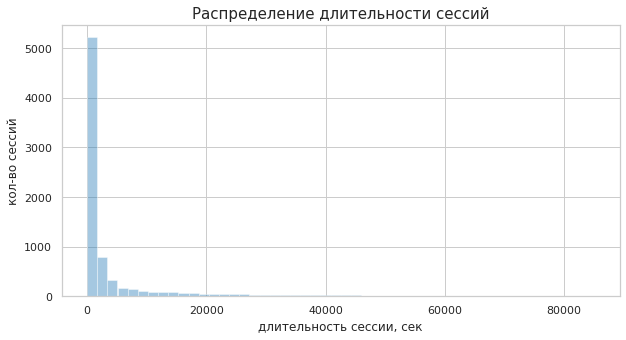

In [28]:
# строим гистограмму распределения данных о длительности сессий

plt.figure(figsize=(10, 5))
sns.set(style='whitegrid', palette='tab10')
sns.distplot(data_session_dur['session_duration'], kde=False)
plt.title('Распределение длительности сессий', fontsize=15)
plt.ylabel('кол-во сессий', fontsize=12)
plt.xlabel('длительность сессии, сек', fontsize=12)
plt.show()

In [29]:
# выводим стат информацию
# о минимальных значениях длительности сессий

display(data_session_dur[data_session_dur['session_duration'] == 0]\
        .groupby('event_date')['session_duration']\
        .count()\
        .describe())

count    28.000000
mean     36.178571
std      10.797989
min      13.000000
25%      27.750000
50%      38.500000
75%      44.250000
max      54.000000
Name: session_duration, dtype: float64

In [30]:
# определяем границы верхнего уса распределения данных о длительности сессий

session_duration_upper_limit = upper_limit(data_session_dur, 'session_duration')
print("Верхняя граница session_duration:", session_duration_upper_limit)

Верхняя граница session_duration: 7092.0


In [31]:
# выводим стат информацию
# о максимальных значениях длительности сессий

display(data_session_dur[data_session_dur['session_duration'] > 7092]\
        .groupby('event_date')['session_duration']\
        .count()\
        .describe())

count    28.000000
mean     45.964286
std      12.102899
min      19.000000
25%      39.500000
50%      46.500000
75%      53.500000
max      67.000000
Name: session_duration, dtype: float64

In [32]:
# выводим информацию о максимально длительной сессии

display(data_session_dur[data_session_dur['session_duration'] == 85049])
display(data[data['user_id'] == '12681fdf-d1d1-454b-9b92-e8a3ccfaf07b'])

session_id                               user_id event_date  \
660         660  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b 2019-11-03   

         event_time_max      event_time_min  session_duration  
660 2019-11-03 23:47:36 2019-11-03 00:10:07             85049

event_time   event_name                               user_id  \
69630 2019-11-02 18:54:27  photos_show  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b   
69659 2019-11-02 19:13:42  photos_show  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b   
70248 2019-11-03 00:10:07  photos_show  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b   
71668 2019-11-03 16:54:45  photos_show  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b   
73063 2019-11-03 23:47:36  photos_show  12681fdf-d1d1-454b-9b92-e8a3ccfaf07b   

       source event_date  week_day  
69630  yandex 2019-11-02         5  
69659  yandex 2019-11-02         5  
70248  yandex 2019-11-03         6  
71668  yandex 2019-11-03         6  
73063  yandex 2019-11-03         6

**Выводы по графику и данным:**

* в течении изучаемого периода времени пользователи осуществили **7 817** сессий;
* **средняя** длительность сессии составила 4 982 секунды, или 83 минуты;
* **минимальная** длительность зафиксирована равной 0; распределение нулевых сессий по дням достаточно равномерное и не имеет аномалий; возможно пользователь в рамках сессии совершил только одно действие;
* **50%** пользователей уложились в 708 секунд, или 12 минут;
* значения, превышающие границу верхнего уса (выбросы) также достаточно равномерно распроеделены по дням без аномальных всплесков;
* **максимальная** длительность сессии составила 85 049 секунд, или сутки; клиент начал сессию ночью и очевидно забыл выйти из приложения; за сутки было осуществлено 3 действия по просмотру фотографий.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_3"></a> 
### Конверсия сессий

Создадим таблицу с имеющимися в датасете сессиями. Для этого агрегируем данные и создадим колонку с уникальным номером сессии. Придадим агрегированным данным бинарный характер (признак совершения действия в рамках сессии обозначим 1).

In [33]:
# аггрегируем данные на уровне сессий,
# пропущенные значения заменяем на 0,
# создаем колонку session_id

data_session_conv = data\
.pivot_table(index=['event_date', 'user_id'], columns = 'event_name', values = 'event_time', aggfunc=('count'))\
.reset_index()\
.drop('event_date', axis=1)\
.drop('user_id', axis=1)\
.fillna(0)

# придаем данным бинарный характер,
# заменяем кол-во действий по типу в рамках одной сессии
# на признак совершений действия = 1

data_session_conv[data_session_conv > 0] = 1
data_session_conv = data_session_conv.reset_index().rename(columns=({'index':'session_id'}))

display(data_session_conv.sample(5))
print(data_session_conv.columns)

event_name  session_id  advert_open  contacts_call  contacts_show  \
125                125          0.0            0.0            0.0   
5912              5912          0.0            0.0            0.0   
192                192          0.0            0.0            0.0   
5144              5144          0.0            0.0            0.0   
5514              5514          0.0            0.0            0.0   

event_name  favorites_add  map  photos_show  search_1  search_2  search_3  \
125                   0.0  0.0          0.0       0.0       0.0       0.0   
5912                  0.0  0.0          0.0       0.0       0.0       0.0   
192                   0.0  1.0          0.0       0.0       0.0       0.0   
5144                  0.0  0.0          1.0       0.0       0.0       0.0   
5514                  0.0  0.0          0.0       0.0       0.0       0.0   

event_name  search_4  search_5  search_6  search_7  tips_click  tips_show  
125              0.0       0.0       0.0       0.0         0.0        1.0  
5912             0.0       0.0       0.0       0.0         0.0        1.0  
192              0.0       0.0       0.0       0.0         0.0        1.0  
5144             0.0       0.0       0.0       0.0         0.0        0.0  
5514             0.0       0.0       0.0       0.0         0.0        1.0

Index(['session_id', 'advert_open', 'contacts_call', 'contacts_show',
       'favorites_add', 'map', 'photos_show', 'search_1', 'search_2',
       'search_3', 'search_4', 'search_5', 'search_6', 'search_7',
       'tips_click', 'tips_show'],
      dtype='object', name='event_name')


Для дальнейшего анализа создадим матрицу действий по сессиям, то есть объединим таблицу data_session_conv с собой. Затем создадим сводную таблицу по целевому действию contacts_show. Данная таблица необходима для создания таблицы уникальных типов сессий с конверсией.

In [34]:
# создаем матрицу действий по сессиям,
# объединяем таблицу data_session_conv с собой

data_session_conv2 = data_session_conv.merge(data_session_conv, how='inner', on='session_id')

# создаем сводную таблицу по целевому действию,
# преобразуем данные

x_lst = ['advert_open_x', 'contacts_call_x'\
         , 'favorites_add_x', 'map_x', 'photos_show_x', 'search_1_x', 'search_2_x'\
         , 'search_3_x', 'search_4_x', 'search_5_x', 'search_6_x', 'search_7_x'\
         , 'tips_click_x', 'tips_show_x', 'contacts_show_x']

y_lst = ['advert_open_y', 'contacts_call_y'\
         , 'favorites_add_y', 'map_y', 'photos_show_y', 'search_1_y', 'search_2_y'\
         , 'search_3_y', 'search_4_y', 'search_5_y', 'search_6_y', 'search_7_y'\
         , 'tips_click_y', 'tips_show_y', 'contacts_show_y']

data_session_conv3 = data_session_conv2.pivot_table(index = x_lst, columns=y_lst, values='session_id', aggfunc=('count'))\
.reset_index()\
.drop(x_lst, axis=1)\
.rename(columns={0.0:'нет', 1.0:'да'})\
.fillna(0)\
.T.reset_index()

# добавляем колонку с кол-вом уникальных сессий
data_session_conv3['session_total'] = data_session_conv3.sum(axis=0)

# удаляем перекрестные колонки
data_session_conv3 = data_session_conv3.drop(data_session_conv3.columns[15:360], axis=1)

Приступаем к созданию таблицы уникальных типов сессий с конверсией. Итоговая таблица будет содержать сведения о типах сессий с уникальным номером, конвертировавшихся  и неконвертироваовщшихся в целевое действие, их количестве и конверсии по каждому типу.

In [35]:
# создаем таблицу уникальных типов сессий с конверсией
# делаем выборку всех типов сессий, конвертировавшихся в целевое действие,
# делаем выборку всех типов сессий, не конвертировавшихся в целевое действие,
# объединяем таблицы, делаем преобразования

y_lst1 = ['advert_open_y', 'contacts_call_y'\
         , 'favorites_add_y', 'map_y', 'photos_show_y', 'search_1_y', 'search_2_y'\
         , 'search_3_y', 'search_4_y', 'search_5_y', 'search_6_y', 'search_7_y'\
         , 'tips_click_y', 'tips_show_y']

data_session_conv_yes = data_session_conv3[data_session_conv3['contacts_show_y'] == 'да']
data_session_conv_no = data_session_conv3[data_session_conv3['contacts_show_y'] == 'нет']
data_session_conv4 = data_session_conv_yes.merge(data_session_conv_no, on=y_lst1, how='left')

# получаем уникальный номер каждого типа сессии
data_session_conv4 = data_session_conv4.reset_index().fillna(0)

# удаляем колонку contacts_show_y_y

data_session_conv4 = data_session_conv4.drop(['contacts_show_y_y'], axis=1)


# переименовываем колонки

data_session_conv4.columns = data_session_conv4.columns.str.replace("_y", "")
data_session_conv4 = data_session_conv4.rename(columns=({'index':'session_type_id', 'session_total_x':'conversion_yes'\
                                    , 'session_total':'conversion_no'}))

# добавляем колонки с общим кол-вом сессий и конверсией

data_session_conv4['session_total'] = data_session_conv4['conversion_yes'] + data_session_conv4['conversion_no']
data_session_conv4['session_conversion'] = (data_session_conv4['conversion_yes'] / data_session_conv4['session_total']).round(2)

# удаляем колонку contacts_show_x

data_session_conv4 = data_session_conv4.drop(['contacts_show_x'], axis=1)

display(data_session_conv4.sort_values(by='session_total', ascending=False).head(10))

session_type_id advert_open contacts_call favorites_add  map photos_show  \
1                 1         нет           нет           нет  нет         нет   
27               27         нет           нет           нет  нет          да   
33               33         нет           нет           нет   да         нет   
30               30         нет           нет           нет  нет          да   
26               26         нет           нет           нет  нет         нет   
85               85          да           нет           нет   да         нет   
3                 3         нет           нет           нет  нет         нет   
76               76          да           нет           нет  нет         нет   
0                 0         нет           нет           нет  нет         нет   
75               75          да           нет           нет  нет         нет   

   search_1 search_2 search_3 search_4 search_5 search_6 search_7 tips_click  \
1       нет      нет      нет      нет      нет      нет      нет        нет   
27      нет      нет      нет      нет      нет      нет      нет        нет   
33      нет      нет      нет      нет      нет      нет      нет        нет   
30       да      нет      нет      нет      нет      нет      нет        нет   
26       да      нет      нет      нет      нет      нет      нет        нет   
85      нет      нет      нет      нет      нет      нет      нет        нет   
3       нет      нет      нет      нет      нет      нет      нет         да   
76      нет      нет      нет      нет      нет      нет      нет        нет   
0       нет      нет      нет      нет      нет      нет      нет        нет   
75      нет      нет      нет      нет      нет      нет      нет        нет   

   tips_show  conversion_yes  conversion_no  session_total  session_conversion  
1         да           286.0         1685.0         1971.0                0.15  
27       нет           107.0          861.0          968.0                0.11  
33        да           173.0          655.0          828.0                0.21  
30       нет            76.0          562.0          638.0                0.12  
26       нет            39.0          390.0          429.0                0.09  
85        да            29.0          267.0          296.0                0.10  
3         да            44.0          141.0          185.0                0.24  
76        да            10.0          121.0          131.0                0.08  
0        нет           116.0            0.0          116.0                1.00  
75       нет             5.0           92.0           97.0                0.05

In [36]:
# выводим стат данные по типам сессий

display(data_session_conv4.describe().T)

count       mean         std   min    25%    50%    75%  \
session_type_id     128.0  63.500000   37.094474  0.00  31.75  63.50  95.25   
conversion_yes      128.0  11.281250   34.020591  1.00   1.00   1.00   5.25   
conversion_no       128.0  47.289062  185.261176  0.00   0.00   3.00  18.00   
session_total       128.0  58.570312  215.692282  1.00   2.00   6.00  29.25   
session_conversion  128.0   0.480625    0.369809  0.04   0.15   0.33   1.00   

                       max  
session_type_id      127.0  
conversion_yes       286.0  
conversion_no       1685.0  
session_total       1971.0  
session_conversion     1.0

In [37]:
# создаем рейтинг ТОП10 типов сессий по кол-ву

session_top_10 = data_session_conv4['session_total'].sort_values(ascending=False)\
.head(10).reset_index().rename(columns=({'index':'session_type_id'}))

session_top_10_conv = data_session_conv4[data_session_conv4['session_type_id'].isin(session_top_10['session_type_id'])]
display(session_top_10_conv.sort_values(by='session_total', ascending=False))

session_type_id advert_open contacts_call favorites_add  map photos_show  \
1                 1         нет           нет           нет  нет         нет   
27               27         нет           нет           нет  нет          да   
33               33         нет           нет           нет   да         нет   
30               30         нет           нет           нет  нет          да   
26               26         нет           нет           нет  нет         нет   
85               85          да           нет           нет   да         нет   
3                 3         нет           нет           нет  нет         нет   
76               76          да           нет           нет  нет         нет   
0                 0         нет           нет           нет  нет         нет   
75               75          да           нет           нет  нет         нет   

   search_1 search_2 search_3 search_4 search_5 search_6 search_7 tips_click  \
1       нет      нет      нет      нет      нет      нет      нет        нет   
27      нет      нет      нет      нет      нет      нет      нет        нет   
33      нет      нет      нет      нет      нет      нет      нет        нет   
30       да      нет      нет      нет      нет      нет      нет        нет   
26       да      нет      нет      нет      нет      нет      нет        нет   
85      нет      нет      нет      нет      нет      нет      нет        нет   
3       нет      нет      нет      нет      нет      нет      нет         да   
76      нет      нет      нет      нет      нет      нет      нет        нет   
0       нет      нет      нет      нет      нет      нет      нет        нет   
75      нет      нет      нет      нет      нет      нет      нет        нет   

   tips_show  conversion_yes  conversion_no  session_total  session_conversion  
1         да           286.0         1685.0         1971.0                0.15  
27       нет           107.0          861.0          968.0                0.11  
33        да           173.0          655.0          828.0                0.21  
30       нет            76.0          562.0          638.0                0.12  
26       нет            39.0          390.0          429.0                0.09  
85        да            29.0          267.0          296.0                0.10  
3         да            44.0          141.0          185.0                0.24  
76        да            10.0          121.0          131.0                0.08  
0        нет           116.0            0.0          116.0                1.00  
75       нет             5.0           92.0           97.0                0.05

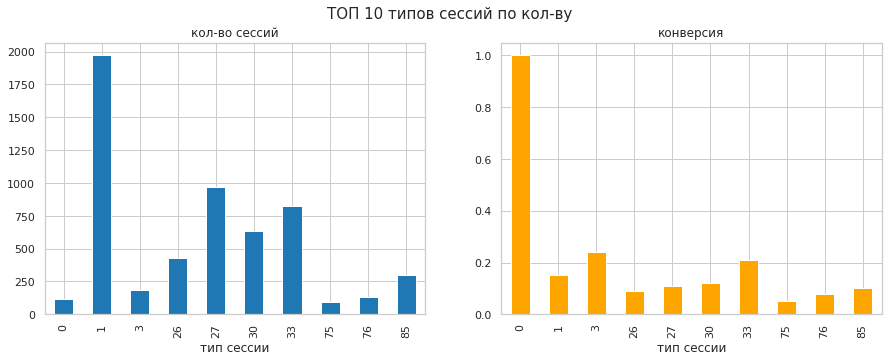

In [38]:
# строим графики рейтинга ТОП10:
# кол-во сессий, уровень конверсии

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('ТОП 10 типов сессий по кол-ву', fontsize=15)

session_top_10_conv['session_total'].plot(ax=axs[0], kind='bar', title='кол-во сессий', xlabel='тип сессии')
session_top_10_conv['session_conversion'].plot(ax=axs[1], kind='bar', title='конверсия', color='orange', xlabel='тип сессии')


plt.show()

**Выводы по графикам и данным:**

* по набору уникальных действий выявлено **128 типов** сессий
* **самый популярный** тип собрал **1 971** сессию
* **максимальное** значение **неконверсионных** сессий в рамках 1 типа = **1 685**
* **максимальное** значение **конверсионных** сессий в рамках 1 типа = **286**
* **ТОП 10** по количеству набранных сессий составили типы:

- **1** **tips_show** = 286 сессий с конверсией / 1 685 сессий без конверсии / **конверсия = 15%**
- **27** **photos_show** = 107 сессий с конверсией / 861 сессия без конверсии / **конверсия = 4%**
- **33** **map + tips_show** = 173 сессии с конверсией / 655 сессий без конверсии / **конверсия = 21%**
- **30** **photos_show + search_1** = 76 сессий с конверсией / 562 сессий без конверсии / **конверсия = 12%**
- **26** **search_1** = 39 сессий с конверсией / 390 сессий без конверсии / **конверсия = 9%**
- **85** **advert_open + map + tips_show** = 29 сессий с конверсией / 267 сессий без конверсии / **конверсия = 10%**
- **3** **tips_click + tips_show** = 44 сессии с конверсией / 141 сессия без конверсии / **конверсия = 24%**
- **76** **advert_open + tips_click** = 10 сессий с конверсией / 121 сессия без конверсии / **конверсия = 8%**
- **0** **contacts_show** = 116 сессий с конверсией / 0 сессий без конверсии / **конверсия = 100%**
- **75** **advert_open** = 5 сессий с конверсией / 95 сессий без конверсии / **конверсия = 5%**

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_4"></a> 
### Анализ воронок, по которым пользователи доходят до просмотра контактов, сравнение их по конверсии и времени до совершения целевого действия

Объединим похожие события в одно, такие как: contacts_show и show_contacts, search_1 — search_7. Для этого создадим копию датафрейма.

In [39]:
df = data.copy()

In [40]:
def replace (event_name):
    if 'search_' in event_name:
        return 'search'
    elif 'show_contacts' in event_name:
        return 'contacts_show'
    else:
         return event_name
df['event_name'] = df['event_name'].apply(replace)
df['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

**Сравним конверсию воронки взаимодействия, с основными карточками, с помощью поиска по сайту search:**

Сформируем датафрейм:

* Уберем пользователей, которые совершали взаимодейсвтией с карточкой tips_click.
* Оставим в датафрейме карточки: search, advert_open, contacts_show, favorites_add, contacts_call.

In [41]:
tips_click = df.query('event_name == "tips_click"')
tips_click_users_list = tips_click['user_id'].unique().tolist()
search = df.query('event_name == "tips_click"')
tips_click_users_list = tips_click['user_id'].unique().tolist()
search = df.query('event_name == "search"')
search_users_list = search['user_id'].unique().tolist()

search_funnel = df.query('user_id not in @tips_click_users_list')
search_funnel = search_funnel.query('user_id in @search_users_list')
search_funnel =  search_funnel.query('event_name == "advert_open" or event_name == "contacts_call" or event_name == "contacts_show" or event_name == "favorites_add" or event_name == "search"')
search_funnel_count = search_funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()
search_funnel_name = search_funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()


fig = go.Figure()
fig.add_trace(go.Funnel(
    y = search_funnel_name,
    x = search_funnel_count,
    textposition = "auto",
    textinfo = "value+percent initial+percent previous"
))
fig.update_layout(title='Воронка взаимодействий пользователей, кто воспользовался только поисковой системой')
search_users_list = search['user_id'].unique().tolist()

search_funnel = df.query('user_id not in @tips_click_users_list')
search_funnel = search_funnel.query('user_id in @search_users_list')
search_funnel =  search_funnel.query('event_name == "advert_open" or event_name == "contacts_call" or event_name == "contacts_show" or event_name == "favorites_add" or event_name == "search"')
search_funnel_count = search_funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()
search_funnel_name = search_funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()


fig = go.Figure()
fig.add_trace(go.Funnel(
    y = search_funnel_name,
    x = search_funnel_count,
    textposition = "auto",
    textinfo = "value+percent initial+percent previous"
))
fig.update_layout(title='Воронка взаимодействий пользователей, кто воспользовался только поисковой системой')
fig.show()

**Вывод:**

* После поиска по сайту 45% пользователей открывают карточку объявления.
* После открытия карточки объявления 44% пользователей просматривают контакты и 20% от общего количества поисковых действий.
* После открытия карточки объявления 63% пользователей добавляют объявление в избранное и 13% от общего кол-ва поисковых действий.
* Пользователи которые звонять по номеру телефона составляют 33% от кол-ва добавленых объявлений в избранное, то есть 1/3 пользователей вовзращаются к объявлениям добавленным в избранное. И всего 4% пользователей звонят по номеру телефона от общего кол-ва поисковых дейсвтий.

 **Сравним конверсию воронки взаимодействия, с основными карточками, с помощью tips_click:**

Сформируем датафрейм, в котором отследим конверсию в целевое contacts_show, а так же contacts_call и favorites_add.

In [42]:
tips_click_funnel = df.query('user_id not in @search_users_list')
tips_click_funnel = tips_click_funnel.query('user_id in @tips_click_users_list')
tips_click_funnel = tips_click_funnel.query('event_name =="tips_click" or event_name == "contacts_show" or event_name =="contacts_call" or event_name =="favorites_add" or event_name =="tips_show"')
tips_click_funnel_count = tips_click_funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()
tips_click_funnel_name = tips_click_funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()

fig = go.Figure()
fig.add_trace(go.Funnel(
    y = tips_click_funnel_name,
    x = tips_click_funnel_count,
    textposition = "auto",
    textinfo = "value+percent initial+percent previous"
))
fig.update_layout(title='Воронка взаимодействий пользователей, кто воспользовался только рекомендательной системой')
fig.show()

**Вывод:**

* У тех пользователей кто взаимодействовал с карточкой tips_click нет взаимодейсвтия с карточкой contacts_call.
* Всего лишь 11% пользователей увидивших карточку tips_show перешли на карточку tips_click.
* Из 659 пользователей перешедшких не рекомендованное объявление 77% посмотрел контакт contacts_show - это отличный показатель.
* Так же 25% пользователей добавили объявление в избранное после перехода на рекомендованное объявление.

**Общий вывод по пункту:**

* Достаточно мало пользователей обращаются внимание на рекомендованные объявления. При этом, нажав на рекомендованное объявление в 77%  случаев пользователи смотрять контакты, что говорит о хорошей системе рекомендованных объявлений, возможно их слишком много. 25% от количества просмотренных контактов в объявлении, пользователи добавляют его в избранное.
* Пользователи чаще пользуются самостоятельным поиском объвлений на сайте и 20% пользователей смотрят контакты. 63% пользователей добавляют его в избранное от количества просмотренных контактов в объявлении, отличный показатель, значит пользователи точно находят что искали и 33% пользователй звонят по номеру телефона в добавленных в избранное объявлениях.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_5"></a> 
### Анализ действий самого активного пользователя

In [43]:
# изучаем распределение данных о целевом действии по уникальным пользователям
# выводим информацию о том, какое кол-во пользователей осуществило какое кол-во просмотров

display(data_target['contacts_show']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index':'кол-во просмотров', 'contacts_show':'кол-во пользователей'})
        .sort_values(by='кол-во просмотров', ascending=False).T)

29    34    28    30    24    23    39    27    38  \
кол-во просмотров     137.0  86.0  83.0  75.0  68.0  65.0  63.0  62.0  61.0   
кол-во пользователей    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                        35    40    36    25    26    37    32    21    31  \
кол-во просмотров     59.0  47.0  42.0  39.0  36.0  32.0  29.0  28.0  26.0   
кол-во пользователей   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   1.0   

                        12    33    17    19    20    22    16    18    14  \
кол-во просмотров     25.0  23.0  22.0  21.0  19.0  18.0  17.0  16.0  15.0   
кол-во пользователей   4.0   1.0   3.0   2.0   2.0   2.0   4.0   3.0   4.0   

                        13    15    9     10    11    8     7     6     5   \
кол-во просмотров     14.0  13.0  12.0  11.0  10.0   9.0   8.0   7.0   6.0   
кол-во пользователей   4.0   4.0  13.0  13.0   7.0  18.0  19.0  33.0  38.0   

                        4     3      2      1      0   
кол-во просмотров      5.0   4.0    3.0    2.0    1.0  
кол-во пользователей  47.0  71.0  105.0  185.0  380.0

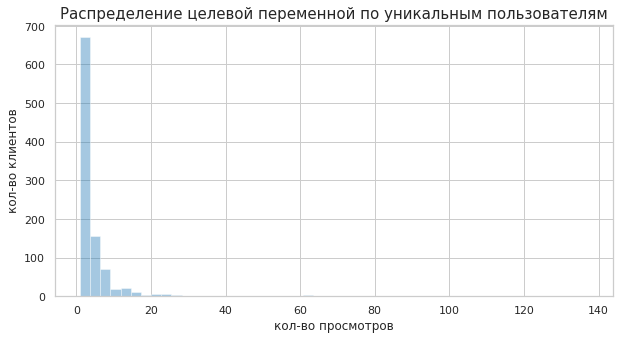

In [44]:
# изучаем распределение данных о целевом действии по уникальным пользователям
# строим гистограмму распределения данных

plt.figure(figsize=(10, 5))
sns.distplot(data_target['contacts_show'], kde=False)
plt.title('Распределение целевой переменной по уникальным пользователям', fontsize=15)
plt.xlabel('кол-во просмотров', fontsize=12)
plt.ylabel('кол-во клиентов', fontsize=12)
plt.show()

**Выводы по графику и данным:**

* распределение данных имеет ассиметричный характер, скошено вправо;
* 75% клиентов осуществили целевое действие от 1 до 4 раз;
* имеются выбросы, максимальное кол-во целевых действий, осуществленных 1 клиентом - 137 раз.

In [45]:
# определяем границы верхнего уса распределения данных целевой переменной

contacts_show_upper_limit = upper_limit(data_target,'contacts_show')
print("Верхняя граница contacts_show:", contacts_show_upper_limit)

Верхняя граница contacts_show: 8.5


In [46]:
# определяем user_id самого активного пользователя по целевой переменной

data_max = data_target[data_target['contacts_show'] == 137]
display(data_max)

# создаем выборку по самому активному пользователю
# без учета действий tops_show

data_max_all_events = data[(data['user_id'] == 'e38cb669-7335-4d56-9de5-c8d5d2f13fd3')\
                           & (data['event_name'] != 'tips_show')]

# выводим количество совершенных действий самым активным пользователем

display(data_max_all_events.groupby('event_name').agg({'event_time':'count'}))

data_max_all_events.head()

event_name                            advert_open  contacts_call  \
user_id                                                            
e38cb669-7335-4d56-9de5-c8d5d2f13fd3          1.0            NaN   

event_name                            contacts_show  favorites_add   map  \
user_id                                                                    
e38cb669-7335-4d56-9de5-c8d5d2f13fd3          137.0            1.0  13.0   

event_name                            photos_show  search_1  search_2  \
user_id                                                                 
e38cb669-7335-4d56-9de5-c8d5d2f13fd3          NaN       NaN       NaN   

event_name                            search_3  search_4  search_5  search_6  \
user_id                                                                        
e38cb669-7335-4d56-9de5-c8d5d2f13fd3       NaN       NaN       1.0       1.0   

event_name                            search_7  tips_click  
user_id                                                     
e38cb669-7335-4d56-9de5-c8d5d2f13fd3       NaN         7.0

event_time
event_name               
advert_open             1
contacts_show         137
favorites_add           1
map                    13
search_5                1
search_6                1
tips_click              7

event_time     event_name                               user_id  \
2929 2019-10-08 11:35:08            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3337 2019-10-08 13:23:13            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3401 2019-10-08 13:36:07  contacts_show  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3420 2019-10-08 13:41:15  contacts_show  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3432 2019-10-08 13:43:09            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   

      source event_date  week_day  
2929  google 2019-10-08         1  
3337  google 2019-10-08         1  
3401  google 2019-10-08         1  
3420  google 2019-10-08         1  
3432  google 2019-10-08         1

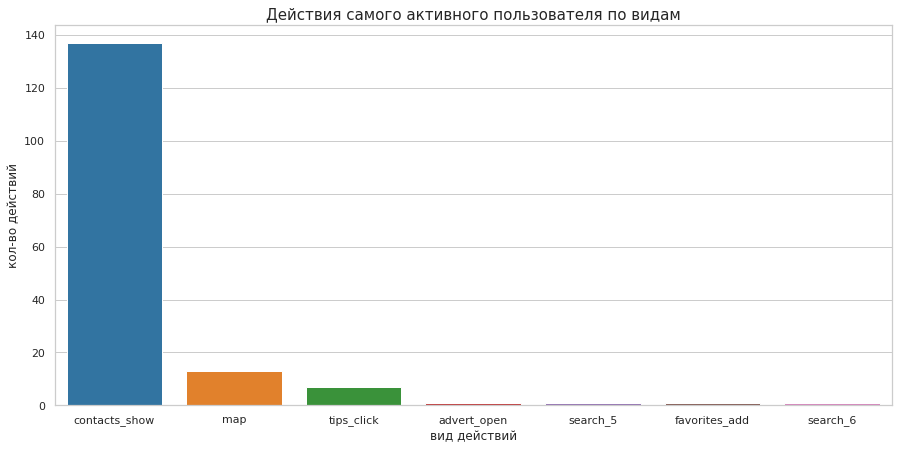

In [47]:
# строим график кол-ва действий самого активного пользователя по видам

plt.figure(figsize=(15, 7))

sns.countplot(data = data_max_all_events, x = 'event_name', order=data_max_all_events["event_name"].value_counts().index)
plt.title('Действия самого активного пользователя по видам', fontsize = 15)
plt.xlabel('вид действий', fontsize = 12)
plt.ylabel('кол-во действий', fontsize = 12)

plt.show()

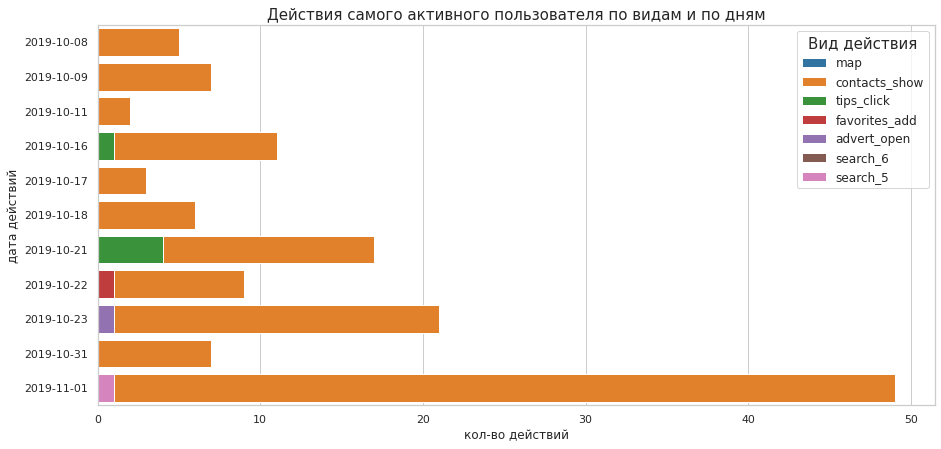

In [48]:
# строим график кол-ва действий самого активного пользователя по видам и по дням

plt.figure(figsize=(15, 7))
data_max_all_events["day_month"] = data_max_all_events['event_date'].dt.to_period("D")
sns.countplot(data = data_max_all_events, y = 'day_month', hue = 'event_name', dodge=False)
plt.title('Действия самого активного пользователя по видам и по дням', fontsize = 15)
plt.xlabel('кол-во действий', fontsize = 12)
plt.ylabel('дата действий', fontsize = 12)
plt.legend(fontsize = 12, \
               loc= 'upper right', \
               title="Вид действия", \
               title_fontsize = 15)
plt.show()

**Выводы по графикам и данным:**

Самый активный пользователь с точки зрения количества совершенных целевых действий пользовался приложением **13 дней из 28**: с 8 по 11 октября, 14 октября, 16-18 октября, 21-23 октября, 31 октября - 1 ноября. Всего пользователь осуществил за этот период **356** действий, ТОП3 из которых:

    - 137 - contacts_show
    - 13 - map
    - 7 - tips_click

В период с 8 октября по 1 ноября в его действиях преобладали contacts_show,  16 и 21 октября осуществлялись действия tips_click,  22 октября пользователь добавлял объявления в избранное, 23 октября открывал рекламу,  1 ноября осуществил поиск 5.

In [49]:
# проверяем длительность сессий самого активного пользователя

display(data_session_dur[data_session_dur['user_id'] == 'e38cb669-7335-4d56-9de5-c8d5d2f13fd3'].describe())

session_id  session_duration
count    13.00000         13.000000
mean   7015.00000       8925.769231
std       3.89444       5926.536484
min    7009.00000        648.000000
25%    7012.00000       6743.000000
50%    7015.00000       8086.000000
75%    7018.00000      11878.000000
max    7021.00000      22087.000000

In [50]:
data_max_all_events.head()

event_time     event_name                               user_id  \
2929 2019-10-08 11:35:08            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3337 2019-10-08 13:23:13            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3401 2019-10-08 13:36:07  contacts_show  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3420 2019-10-08 13:41:15  contacts_show  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   
3432 2019-10-08 13:43:09            map  e38cb669-7335-4d56-9de5-c8d5d2f13fd3   

      source event_date  week_day   day_month  
2929  google 2019-10-08         1  2019-10-08  
3337  google 2019-10-08         1  2019-10-08  
3401  google 2019-10-08         1  2019-10-08  
3420  google 2019-10-08         1  2019-10-08  
3432  google 2019-10-08         1  2019-10-08

Посмотрим на порядок действий самого активного пользователя по времени 21-10-2019:

In [51]:
data_max_all_events = data_max_all_events[data_max_all_events['event_date'] == '2019-10-21']
data_max_all_events[['event_time', 'event_name']].sort_values(by='event_time', ascending=True)

event_time     event_name
34239 2019-10-21 11:52:27  contacts_show
34241 2019-10-21 11:53:01  contacts_show
34291 2019-10-21 12:07:10  contacts_show
34293 2019-10-21 12:07:36  contacts_show
34294 2019-10-21 12:07:44  contacts_show
34296 2019-10-21 12:08:06  contacts_show
34312 2019-10-21 12:12:57  contacts_show
34323 2019-10-21 12:14:13  contacts_show
34329 2019-10-21 12:15:11  contacts_show
34332 2019-10-21 12:15:25  contacts_show
34340 2019-10-21 12:16:19  contacts_show
34347 2019-10-21 12:17:10  contacts_show
34359 2019-10-21 12:19:01     tips_click
34726 2019-10-21 14:15:12  contacts_show
34733 2019-10-21 14:16:25  contacts_show
34740 2019-10-21 14:18:05  contacts_show
34744 2019-10-21 14:19:38     tips_click
34748 2019-10-21 14:19:57     tips_click
34749 2019-10-21 14:20:20     tips_click
34764 2019-10-21 14:23:21  contacts_show
34781 2019-10-21 14:27:37  contacts_show

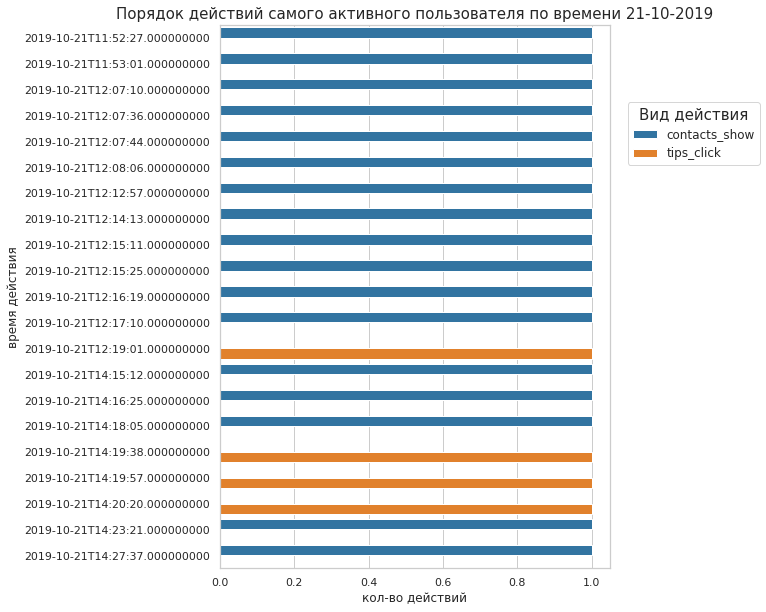

In [52]:
# строим график распределения действий самого активного целевого пользователя во времени
# на примере 1 дня 21.10.2019 (2 типа действий кроме tips_show)

plt.figure(figsize=(7, 10))
sns.countplot(data = data_max_all_events[data_max_all_events['event_date'] == '2019-10-21']\
              , y = 'event_time', hue = 'event_name')
plt.legend()
plt.title('Порядок действий самого активного пользователя по времени 21-10-2019', fontsize = 15)
plt.xlabel('кол-во действий', fontsize = 12)
plt.ylabel('время действия', fontsize = 12)
plt.legend(fontsize = 12, \
               bbox_to_anchor= (1.03, 0.8), \
               title="Вид действия", \
               title_fontsize = 15)

plt.show()

**Выводы по графику и данным:**

* за исследуемый период самый активный пользователь осуществил 13 сессий от 648 секунд (11 минут) до 22 087 секунд (6 часов), что находится в пределах нормы данного датасета;
* порядок действий имеет логичный характер, действия contacts_show и tips_click чередуют друг друга.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_6"></a> 
### Анализ действий группы активных пользователей

In [53]:
# создаем выборку данных по активным пользователям,
# у которых кол-во целевых действий попало в диапазон выше границы верхнего уса,
# но ниже максимального значения

data_target_top = data_all_users[(data_all_users['contacts_show'] > 8.5) & (data_all_users['contacts_show'] < 137)]
display(data_target_top.sample(2))
display(data_target_top['contacts_show'].describe())

event_name                            advert_open  contacts_call  \
user_id                                                            
c3344ff6-7b53-474a-8703-880ea1f892ea          NaN            NaN   
5394784c-cc24-4156-b4ad-3b2cbbb665f4          NaN            4.0   

event_name                            contacts_show  favorites_add  map  \
user_id                                                                   
c3344ff6-7b53-474a-8703-880ea1f892ea            9.0            NaN  NaN   
5394784c-cc24-4156-b4ad-3b2cbbb665f4           13.0            NaN  NaN   

event_name                            photos_show  search_1  search_2  \
user_id                                                                 
c3344ff6-7b53-474a-8703-880ea1f892ea          NaN       NaN       NaN   
5394784c-cc24-4156-b4ad-3b2cbbb665f4          NaN       NaN       NaN   

event_name                            search_3  search_4  search_5  search_6  \
user_id                                                                        
c3344ff6-7b53-474a-8703-880ea1f892ea       NaN       NaN       NaN       NaN   
5394784c-cc24-4156-b4ad-3b2cbbb665f4       NaN       NaN       NaN       NaN   

event_name                            search_7  tips_click  
user_id                                                     
c3344ff6-7b53-474a-8703-880ea1f892ea       NaN         NaN  
5394784c-cc24-4156-b4ad-3b2cbbb665f4       NaN         NaN

count    102.000000
mean      20.088235
std       17.272483
min        9.000000
25%       11.000000
50%       12.500000
75%       21.750000
max       86.000000
Name: contacts_show, dtype: float64

In [54]:
# изучаем распределение данных о целевом действии в группе активных пользователей
# выводим информацию о том, какое кол-во пользователей осуществило какое кол-во просмотров

display(data_target_top['contacts_show']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index':'кол-во просмотров', 'contacts_show':'кол-во пользоавателей'})
        .sort_values(by='кол-во просмотров', ascending=False).T)

25    22    21    16    29    17    28    23    24  \
кол-во просмотров      86.0  83.0  75.0  68.0  65.0  63.0  62.0  61.0  59.0   
кол-во пользоавателей   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                         15    18    30    26    19    27    13    20    7   \
кол-во просмотров      47.0  42.0  39.0  36.0  32.0  29.0  28.0  26.0  25.0   
кол-во пользоавателей   1.0   1.0   1.0   1.0   1.0   1.0   2.0   1.0   4.0   

                         31    9     14    11    12    5     10    8     6   \
кол-во просмотров      23.0  22.0  21.0  19.0  18.0  17.0  16.0  15.0  14.0   
кол-во пользоавателей   1.0   3.0   2.0   2.0   2.0   4.0   3.0   4.0   4.0   

                         4     2     1     3     0   
кол-во просмотров      13.0  12.0  11.0  10.0   9.0  
кол-во пользоавателей   4.0  13.0  13.0   7.0  18.0

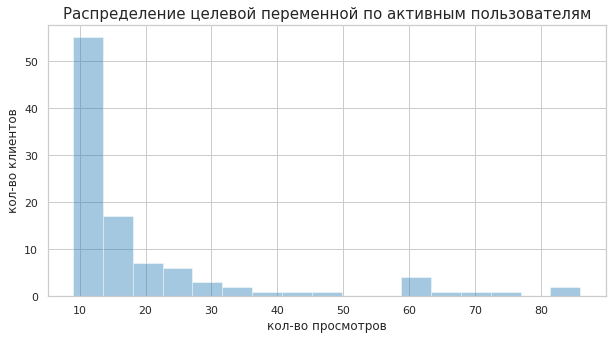

In [55]:
# строим гистограмму распределения данных

plt.figure(figsize=(10, 5))
sns.distplot(data_target_top['contacts_show'], kde=False)
plt.title('Распределение целевой переменной по активным пользователям', fontsize=15)
plt.xlabel('кол-во просмотров', fontsize=12)
plt.ylabel('кол-во клиентов', fontsize=12)
plt.show()

**Выводы по графику и данным:**

* в группу активных пользователей, количество целевых действий которых находится в диапазоне между 8 (граница верхнего уса) и 137 (максимальное значение) вошло 102 пользователя;
* данные имеют ассиметричное распределение, скошенное вправо;
* минимальное кол-во целевых действий в группе равно 9;
* среднее значение равно 20;
* 75% пользователей в группе совершили до 22 целевых действий;
* максимальное значение равно 86.

In [56]:
# выводим количество действий, совершенных в активной группе по видам
# исключаем действие tips_show

data_active_all_events = data[(data['user_id'].isin(data_target_top.index)) & (data['event_name'] != 'tips_show')]
print('Всего действий в группе активных пользователей:', data_active_all_events['event_name'].count())
display(data_active_all_events.groupby(['event_name'])['event_time']\
        .count()\
        .sort_values(ascending=False))

Всего действий в группе активных пользователей: 3666


event_name
contacts_show    2049
map               383
photos_show       325
search_1          245
advert_open       232
contacts_call     155
tips_click         86
search_5           66
favorites_add      38
search_3           29
search_4           28
search_6           13
search_2            9
search_7            8
Name: event_time, dtype: int64

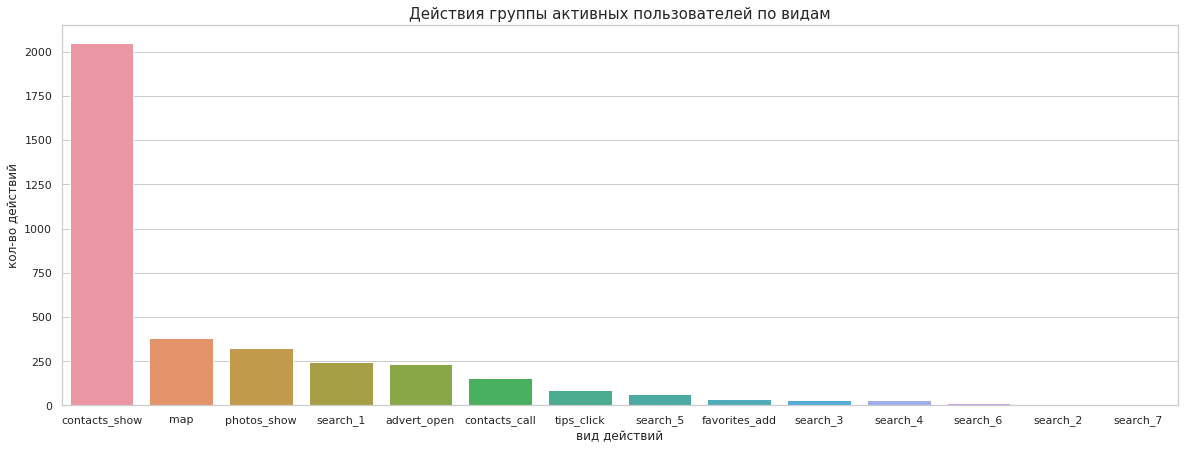

In [57]:
# строим график кол-ва действий группы активных пользователей по видам
# исключая tips_show

plt.figure(figsize=(20, 7))
sns.countplot(data = data_active_all_events, x = 'event_name', order=data_active_all_events["event_name"].value_counts().index)
plt.title('Действия группы активных пользователей по видам', fontsize = 15)
plt.xlabel('вид действий', fontsize = 12)
plt.ylabel('кол-во действий', fontsize = 12)

plt.show()

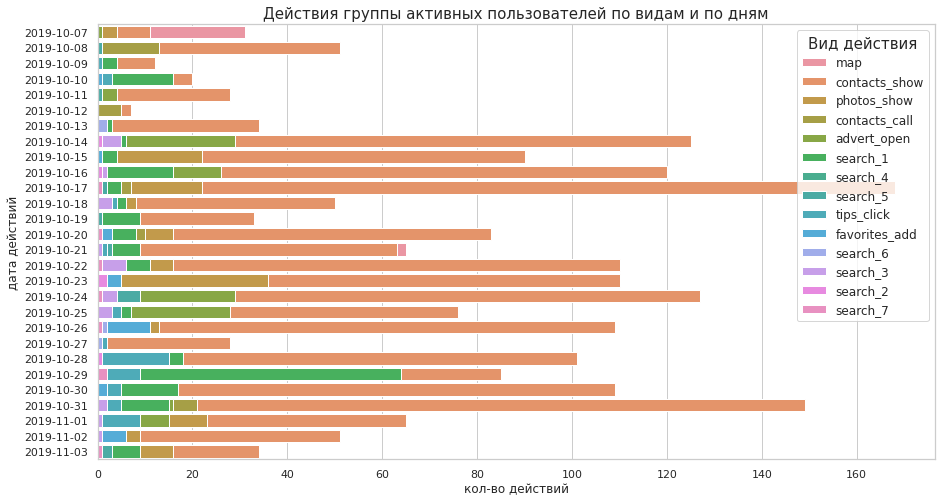

In [58]:
# строим график кол-ва действий группы активных пользователей по видам и по дням

plt.figure(figsize=(15, 8))
data_active_all_events["day_month"] = data_active_all_events['event_date'].dt.to_period("D")
sns.countplot(data = data_active_all_events, y = 'day_month', hue = 'event_name', dodge=False)
plt.title('Действия группы активных пользователей по видам и по дням', fontsize = 15)
plt.xlabel('кол-во действий', fontsize = 12)
plt.ylabel('дата действий', fontsize = 12)
plt.legend(fontsize = 12, \
               loc= 'upper right', \
               title="Вид действия", \
               title_fontsize = 15)
plt.show()

**Выводы по графикам и данным:**

* группа активных пользователей совершала целевые действия в приложении на протяжении всего исследуемого периода
* всего пользователи группы осуществили за этот период **8 079** действий, ТОП3 из которых, не считая tips_show:


    - 2 049 - contacts_show
    - 383 - map
    - 325 - photos_show


* набор действий включает в себя весь список;
* среди поисковых запросов выделяется *search_1*, который входит в пятерку лидеров;
* замыкает пятерку лидеров действие advert_open;
* распределение действий по дням не равномерное, но лидерство в большинстве случаев принадлежит действию contacts_show; несколько раз на первое место выходит search_1.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_7"></a> 
### Анализ действий группы базовых пользоватлей

In [59]:
# создаем выборку данных по пользователям, составляющим базовую группу,
# у которых кол-во целевых действий попало в диапазон ниже границы верхнего уса

data_target_base = data_all_users[data_all_users['contacts_show'] < 8.5]
display(data_target_base.sample(2))
display(data_target_base['contacts_show'].describe())

event_name                            advert_open  contacts_call  \
user_id                                                            
475f8fc3-d48c-4bf6-9ebf-f41c6427aa69          5.0            NaN   
4d9bb06f-3c4f-43a9-91f7-11a38386dc04          NaN            NaN   

event_name                            contacts_show  favorites_add  map  \
user_id                                                                   
475f8fc3-d48c-4bf6-9ebf-f41c6427aa69            1.0            NaN  1.0   
4d9bb06f-3c4f-43a9-91f7-11a38386dc04            2.0            NaN  NaN   

event_name                            photos_show  search_1  search_2  \
user_id                                                                 
475f8fc3-d48c-4bf6-9ebf-f41c6427aa69          NaN       NaN       NaN   
4d9bb06f-3c4f-43a9-91f7-11a38386dc04          NaN       NaN       NaN   

event_name                            search_3  search_4  search_5  search_6  \
user_id                                                                        
475f8fc3-d48c-4bf6-9ebf-f41c6427aa69       6.0       NaN       NaN       NaN   
4d9bb06f-3c4f-43a9-91f7-11a38386dc04       NaN       NaN       NaN       NaN   

event_name                            search_7  tips_click  
user_id                                                     
475f8fc3-d48c-4bf6-9ebf-f41c6427aa69       NaN         NaN  
4d9bb06f-3c4f-43a9-91f7-11a38386dc04       NaN         NaN

count    878.000000
mean       2.500000
std        1.876914
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: contacts_show, dtype: float64

In [60]:
# изучаем распределение данных о целевом действии в группе базовых пользователей
# выводим информацию о том, какое кол-во пользователей осуществило какое кол-во просмотров

display(data_target_base['contacts_show']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index':'кол-во просмотров', 'contacts_show':'кол-во пользоавателей'})
        .sort_values(by='кол-во просмотров', ascending=False).T)

7     6     5     4     3      2      1      0
кол-во просмотров       8.0   7.0   6.0   5.0   4.0    3.0    2.0    1.0
кол-во пользоавателей  19.0  33.0  38.0  47.0  71.0  105.0  185.0  380.0

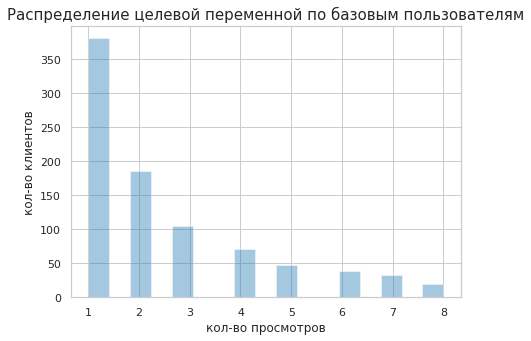

In [61]:
# строим гистограмму распределения данных

plt.figure(figsize=(7, 5))
sns.distplot(data_target_base['contacts_show'], kde=False)
plt.title('Распределение целевой переменной по базовым пользователям', fontsize=15)
plt.xlabel('кол-во просмотров', fontsize=12)
plt.ylabel('кол-во клиентов', fontsize=12)
plt.show()

**Выводы по графику и данным:**

* в группу базовых пользователей, количество целевых действий которых находится в диапазоне от 8 и ниже (граница верхнего уса) вошло 878 пользователей;
* данные имеют ассиметричное распределение, скошенное вправо, не имеют выбросов;
* минимальное кол-во целевых действий в группе равно 1;
* среднее значение равно 2,5;
* 75% пользователей в группе совершили до 3 целевых действий;
* максимальное значение равно 8.

In [62]:
# выводим количество действий, совершенных в базовой группе по видам
# исключаем действие tips_show

data_base_all_events = data[(data['user_id'].isin(data_target_base.index)) & (data['event_name'] != 'tips_show')]
print('Всего действий в группе базовых пользователей:', data_base_all_events['event_name'].count())
display(data_base_all_events.groupby(['event_name'])['event_time']\
        .count()\
        .sort_values(ascending=False))

Всего действий в группе базовых пользователей: 10075


event_name
photos_show      3172
contacts_show    2195
advert_open      1352
search_1         1095
map               670
contacts_call     383
favorites_add     382
tips_click        239
search_5          182
search_4          121
search_3          114
search_2           87
search_6           60
search_7           23
Name: event_time, dtype: int64

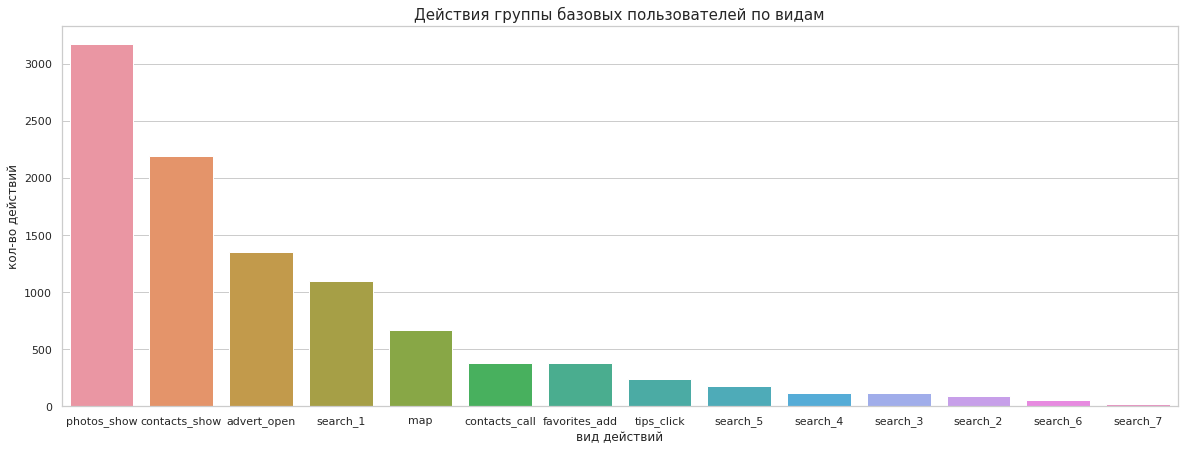

In [63]:
# строим график кол-ва действий группы базовых пользователей по видам

plt.figure(figsize=(20, 7))
sns.countplot(data = data_base_all_events, x = 'event_name', order=data_base_all_events["event_name"].value_counts().index)
plt.title('Действия группы базовых пользователей по видам', fontsize = 15)
plt.xlabel('вид действий', fontsize = 12)
plt.ylabel('кол-во действий', fontsize = 12)

plt.show()

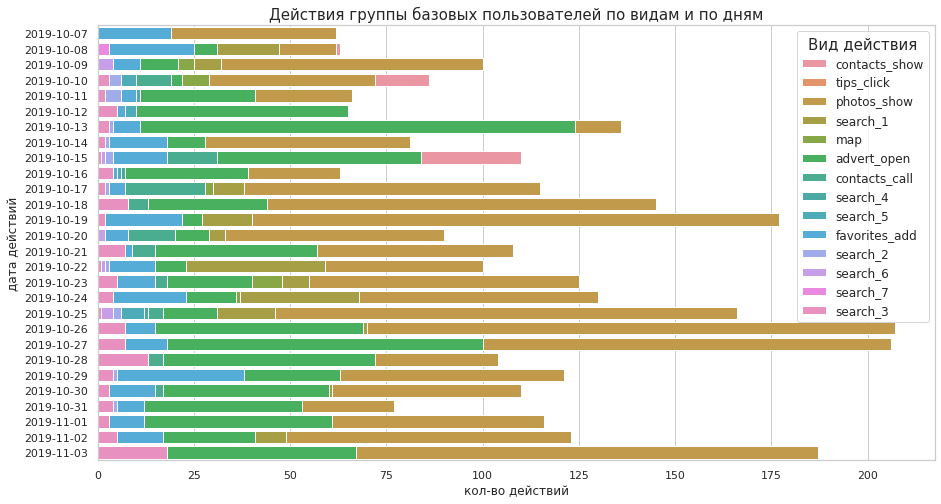

In [64]:
# строим график кол-ва действий группы базовых пользователей по видам и по дням

plt.figure(figsize=(15, 8))
data_base_all_events["day_month"] = data_base_all_events['event_date'].dt.to_period("D")
sns.countplot(data = data_base_all_events, y = 'day_month', hue = 'event_name', dodge=False)
plt.title('Действия группы базовых пользователей по видам и по дням', fontsize = 15)
plt.xlabel('кол-во действий', fontsize = 12)
plt.ylabel('дата действий', fontsize = 12)
plt.legend(fontsize = 12, \
               loc= 'upper right', \
               title="Вид действия", \
               title_fontsize = 15)
plt.show()

In [65]:
# проверяем длительность сессий в группе базовых пользователей

display(data_session_dur[data_session_dur['user_id'].isin(data_target_base.index)].describe())

session_id  session_duration
count  2020.000000       2020.000000
mean   3766.296040       6829.802475
std    2326.456397      13859.393095
min      17.000000          0.000000
25%    1666.750000        134.750000
50%    3721.500000        893.500000
75%    5799.250000       5704.750000
max    7800.000000      83173.000000

**Выводы по графикам и данным:**

* группа базовых пользователей совершала целевые действия в приложении на протяжении всего исследуемого периода;
* всего пользователи группы осуществили за этот период **18 165** действий, ТОП3 из которых кроме tips_show:


    - 3 172 - photos_show
    - 2 195 - contacts_show
    - 1 352 - advert_open


* набор действий включает в себя весь список,  в пятерку лидеров тажке вошли *search_1* (1 095 действий) и *map* (670 действий);
* распределение действий по дням не равномерное, но лидерство в большинстве случаев принадлежит действию photos_show; на втором месте чаще всего идет advert_open или contacts_show / favorites_add;
* всего за период группа осуществила 2 020 сессий в диапазоне от 0 до 83 173 секунд (23 часа);
* в связи со значимым стандартным отклонением целесообразно за среднее значение длительности сессии принять медиану = 14,89 минут.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_8"></a> 
### Анализ действий пользователей, не совершивших целевое действие

In [66]:
# создаем выборку данных по пользователям,
# не осуществившим целевое действие просмотра контактов (contacts_show)

# производим замену пропущенных значений на 0 в переменной со всеми действиями пользователей
data_all_users_target_null = data_all_users.fillna(0)
data_all_users_null = data_all_users_target_null[data_all_users_target_null['contacts_show'] == 0]

# создаем выборку по пользователям, не осуществившим целевое действие
data_target_null = data_all_users[data_all_users.index.isin(data_all_users_null.index)]

# создаем переменную с количеством действий, совершенных в нецелевой группе по видам 
data_null_all_events = data[data['user_id'].isin(data_target_null.index)]


# выводим данные
print('Всего пользователей в нецелевой группе:', data_target_null.shape)
print()
print('Всего действий, совершенных в нецелевой группе:', data_null_all_events['event_name'].count())
display(data_target_null.describe().T.sort_values(by='count', ascending=False))

Всего пользователей в нецелевой группе: (3312, 14)

Всего действий, совершенных в нецелевой группе: 46479


count      mean        std  min  25%  50%  75%    max
event_name                                                           
map            1167.0  2.308483   3.789141  1.0  1.0  1.0  2.0   71.0
photos_show     756.0  7.771164   9.845657  1.0  3.0  5.0  9.0  123.0
advert_open     613.0  7.438825  11.612687  1.0  2.0  4.0  8.0  131.0
search_1        550.0  3.907273   3.911189  1.0  2.0  3.0  5.0   43.0
search_5        549.0  1.457195   1.346965  1.0  1.0  1.0  1.0   22.0
search_4        386.0  1.430052   2.118938  1.0  1.0  1.0  1.0   35.0
search_6        278.0  1.388489   1.268962  1.0  1.0  1.0  1.0   17.0
tips_click      222.0  2.157658   2.218273  1.0  1.0  1.0  2.0   18.0
favorites_add   215.0  4.618605   7.384223  1.0  1.0  2.0  5.0   63.0
search_2        187.0  1.219251   0.497362  1.0  1.0  1.0  1.0    4.0
search_3        170.0  2.223529   2.046076  1.0  1.0  1.5  3.0   13.0
search_7        132.0  1.446970   1.394178  1.0  1.0  1.0  1.0   13.0
contacts_call     0.0       NaN        NaN  NaN  NaN  NaN  NaN    NaN
contacts_show     0.0       NaN        NaN  NaN  NaN  NaN  NaN    NaN

In [67]:
# выводим количество действий, совершенных в нецелевой группе по видам
# исключаем действие tips_show

data_null_all_events = data[(data['user_id'].isin(data_target_null.index)) & (data['event_name'] != 'tips_show')]
print('Всего действий в группе нецелевых пользователей:', data_null_all_events['event_name'].count())
display(data_null_all_events.groupby(['event_name'])['event_time']\
        .count()\
        .sort_values(ascending=False))

Всего действий в группе нецелевых пользователей: 19285


event_name
photos_show      5875
advert_open      4560
map              2694
search_1         2149
favorites_add     993
search_5          800
search_4          552
tips_click        479
search_6          386
search_3          378
search_2          228
search_7          191
Name: event_time, dtype: int64

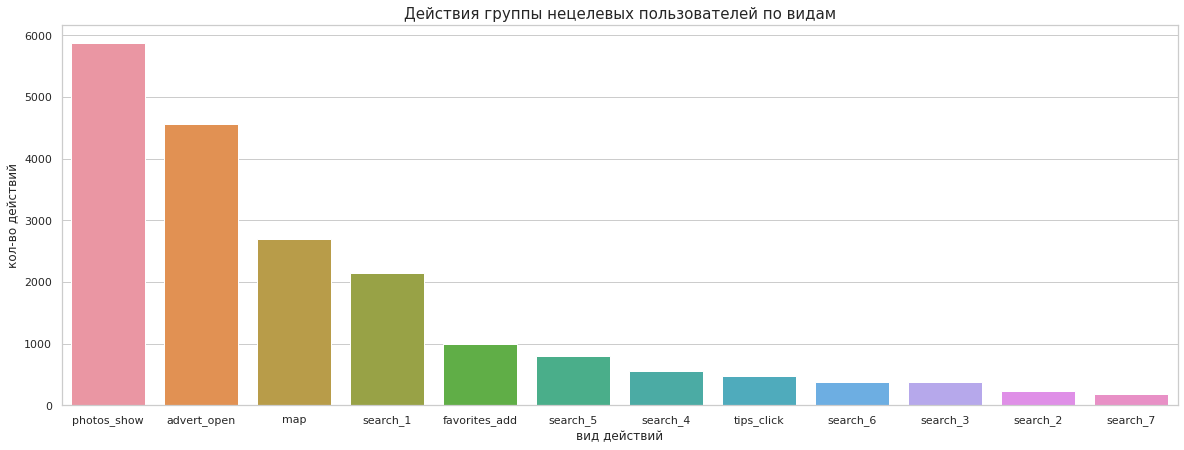

In [68]:
# строим график кол-ва действий группы нецелевых пользователей по видам

plt.figure(figsize=(20, 7))
sns.countplot(data = data_null_all_events, x = 'event_name', order=data_null_all_events["event_name"].value_counts().index)
plt.title('Действия группы нецелевых пользователей по видам', fontsize = 15)
plt.xlabel('вид действий', fontsize = 12)
plt.ylabel('кол-во действий', fontsize = 12)

plt.show()

**Выводы по графику и данным:**

* **3 312** пользователей, или 77%, не совершили целевого действия *contacts_show*, а также действия *contacts_call* в пределах изучаемого периода
* всего пользователи группы осуществили за этот период **46 479** действий, ТОП3 из которых кроме tips_show:


    - 5 875 - photos_show (756 пользователей)
    - 4 560 - advert_open (613 пользователей)
    - 2694 - map (1 167 пользователей)


* в пятерку лидеров тажке вошли *search_1* (2 149 действий) и *favorites_add* (993 действия);
* средние значения по кол-ву действий колеблятся в диапазоне от 1,22 (*search_2*) до 7,77 (*photos_show*);
* стандартные отклонения в группе ТОП5 по количеству колеблятся в диапазоне от 3,8 (*search_1*) до 11,61 (*advert_open*), по остальным действиям - в диапазоне 0,5 (*search_2*) и 7,4 (*favorites_add*)
* минимальные значения все равны 1;
* медианные значения находятся в диапазоне от 1 до 5 (*photos_show*);
* разброс максимальных значений от 4 (*search_2*) до 131 (*advert_open*).

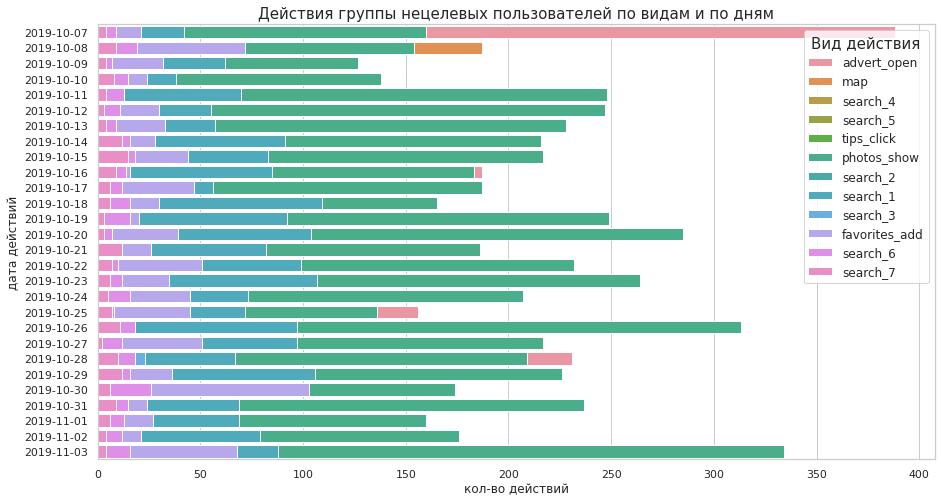

In [69]:
# строим график кол-ва действий группы нецелевых пользователей по видам и по дням

plt.figure(figsize=(15, 8))
data_null_all_events["day_month"] = data_null_all_events['event_date'].dt.to_period("D")
sns.countplot(data = data_null_all_events, y = 'day_month', hue = 'event_name', dodge=False)
plt.title('Действия группы нецелевых пользователей по видам и по дням', fontsize = 15)
plt.xlabel('кол-во действий', fontsize = 12)
plt.ylabel('дата действий', fontsize = 12)
plt.legend(fontsize = 12, \
               loc= 'upper right', \
               title="Вид действия", \
               title_fontsize = 15)
plt.show()

In [70]:
# проверяем длительность сессий в группе нецелевых пользователей

display(data_session_dur[data_session_dur['user_id'].isin(data_target_null.index)].describe())

session_id  session_duration
count  5342.000000       5342.000000
mean   3912.217896       3842.934669
std    2226.529731       9977.161540
min       0.000000          0.000000
25%    1987.250000        141.000000
50%    3876.500000        619.500000
75%    5844.750000       2026.000000
max    7797.000000      85049.000000

**Выводы по графику:**

* распределение действий по дням группы пользователей, не совершивших целевое действие, носит неравномерный характер;
* абсолютным лидером за весь период на ежедневной основе является действие *photos_show*;
* на втором месте за весь период идет действие *search_1*;
* иногда его опережает *favorites_add*;
* группа осуществила 5 342 сессии в диапазоне от 0 до 85 049 секунд (23,5 часа);
* в связи с существенным стандартным отклонением за среднее значение длительности сессии принимаем медиану - 10,32 минуты.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_9"></a> 
### Анализ действий целевой группы по дням недели¶

In [71]:
# аггрегируем данные о совершенных событиях
# пользователями целевой группы по дням недели

data_target_all_events = data[data['user_id'].isin(data_target.index)]
display(data_target_all_events.pivot_table(index='event_name', columns='week_day', values='event_time'\
                                           , aggfunc=('count'), margins=True)\
                                           .sort_values(by=3, ascending=False))

week_day          0     1     2     3     4     5     6    All
event_name                                                    
All            3733  4020  3808  4247  4015  3283  3494  26600
tips_show      1820  1940  1851  2148  2030  1453  1456  12698
contacts_show   624   675   685   803   648   436   510   4381
photos_show     384   415   466   451   550   580   651   3497
search_1        148   269   202   183   157   204   177   1340
advert_open     207   224   205   175   230   213   331   1585
map             245   162   148   161   139   106   105   1066
contacts_call    73    86    74   118    53    65    69    538
favorites_add    60    99    53    49    34    78    48    421
tips_click       67    43    40    45    53    51    33    332
search_5         35    38    26    39    42    32    37    249
search_4         18    21    17    25    28    20    20    149
search_3         28    13    14    19    21    20    28    143
search_2         12    15    14    16    17    12    10     96
search_6         10     8     9    11    11     9    16     74
search_7          2    12     4     4     2     4     3     31

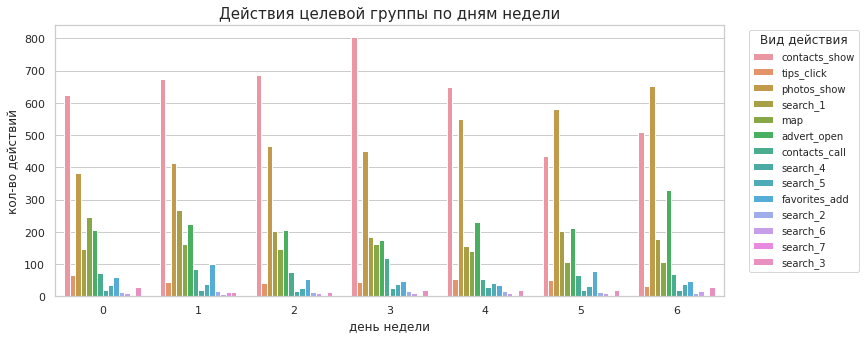

In [72]:
# строим график кол-ва действий целевой группы по дням недели,
# исключаем действие tips_show

data_target_all_events = data[(data['user_id'].isin(data_target.index)) & (data['event_name'] != 'tips_show')]
plt.figure(figsize=(12, 5))
sns.countplot(data = data_target_all_events, x = 'week_day', hue = 'event_name', dodge=True)
plt.title('Действия целевой группы по дням недели', fontsize = 15)
plt.xlabel('день недели', fontsize = 12)
plt.ylabel('кол-во действий', fontsize = 12)
plt.legend(fontsize = 10, \
               bbox_to_anchor= (1.03, 1.0), \
               title="Вид действия", \
               title_fontsize = 12)

plt.show()

**Выводы по графику и данным:**

* самым **активным** днем недели среди пользователей, осуществивших целевое действие, является **четверг**; по четвергам пользователи целевой группы совершили **4 247** действий, из них **ТОП3**, кроме tips_show:


    - contacts_show = 803
    - photos_show = 451
    - search_1 = 183
    - advert_open = 175


* самым **пассивным** днем недели является **суббота**; по субботам пользователи совершили 3 283 действия, из них ТОП3, кроме tips_show:


    - photos_show = 580
    - contacts_show = 436
    - search_1 = 204
    - advert_open = 213


* на протяжении всех дней недели тройка лидеров остается неизменной;
* только в выходные дни (суббота, воскресенье) *contacts_show* и *photos_show* меняются местами;
* *search_1* и *advert_open* периодически меняются местами;
* распределение данных спокойное, без аномальных всплесков, с единым паттерном.

**В ходе исследования было выделено и описано 3 ключевых профиля пользователей**:

**целевой активный пользователь:**
• 4,5 раза заходит в приложение на протяжении 28 дней
• длительность сессии 1 час
• совершает 79 действий
• из них: 20 целевых
просмотра контактов
• 43 раза просматривает рекомендованные объявления
• 4 раза просматривает карту
• 3 раза просматривает фотографии.

**целевой базовый пользователь:**
• 2 раза заходит в приложение на протяжении 28 дней
• длительность сессии 15 мин
• совершает 15 действий
• из них: 2,5 целевых просмотра контактов
• 9 раз просматривает рекомендованные объявления
• 3,5 раза просматривает фотографии
• 1,5 раза открывает рекламу

**нецелевой пользователь:**
• 1,6 раза заходит в приложение на протяжении 28 дней
• длительность сессии 10 мин
• совершает 14 действий
• из них: 8 раз просматривает рекомендованные объявления
• 1,8 раза просматривает фотографии
• 1,4 раза открывает рекламу
• 0,8 раз просматривает карту
• 0,7 раз запускает поиск 

Таким образом, пользователи в первую очередь отличаются своей активностью и временем, проведенным в приложении. Пользователи, чаще просматривающие рекомендованные обявления чаще просматривают контакты. Очевидно, что рекомендованные объявления являются информационным ядром продукта. Рекомендуется разработать метрику по оценке качества этого параметра, отслеживать ее на регулярной основе и постоянно работать над улучшением.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_10"></a> 
### Метрика DAU¶

**Все пользователи**

In [73]:
# создаем переменную распределения всех пользователей по дням

dau_all = data.groupby('event_date')['user_id'].nunique()

Посмотрим на динамику количества всех пользователей по дням.

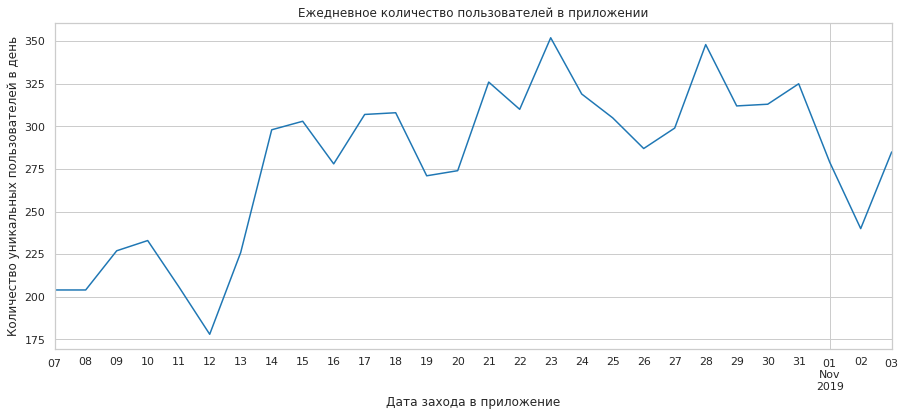

In [74]:
data.groupby('event_date').agg({'user_id':'nunique'}).plot(grid=True, figsize=(15,6), legend= False)
plt.xlabel('Дата захода в приложение')
plt.ylabel('Количество уникальных пользователей в день')
plt.title('Ежедневное количество пользователей в приложении')
plt.show()

In [75]:
# выводим стат данные распределения всех пользователей по дням

display(dau_all.describe())

count     28.000000
mean     279.178571
std       46.737291
min      178.000000
25%      238.250000
50%      292.500000
75%      310.500000
max      352.000000
Name: user_id, dtype: float64

**Выводы по графикам и данным:**

* распределение пользователей по дням имеет достаточно ровный одномодальный характер, без выбросов;
* минимальное количество пользователей в день составило **279** человек;
* среднее количество пользователей - **178** человек;
* максимальное - **352** человека;
* значения медианы и среднего близки;
* стандартное отклонение не велико = 46,74.

**Целевые пользователи**

In [76]:
# создаем переменную распределения целевых пользователей по дням

dau_target = data_target_all_events.groupby('event_date')['user_id'].nunique()

Посмотрим на динамику количества целевых пользователей по дням.

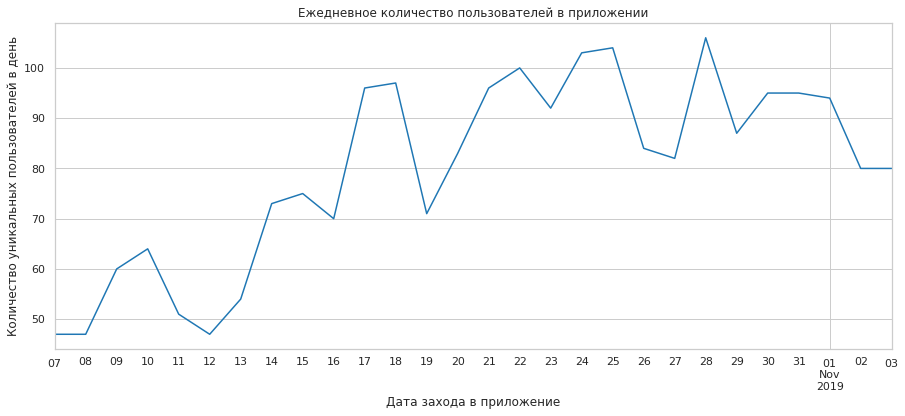

In [77]:
data_target_all_events.groupby('event_date').agg({'user_id':'nunique'}).plot(grid=True, figsize=(15,6), legend= False)
plt.xlabel('Дата захода в приложение')
plt.ylabel('Количество уникальных пользователей в день')
plt.title('Ежедневное количество пользователей в приложении')
plt.show()

In [78]:
# выводим стат данные распределения целевых пользователей по дням

display(dau_target.describe())

count     28.000000
mean      79.750000
std       18.800364
min       47.000000
25%       68.500000
50%       82.500000
75%       95.250000
max      106.000000
Name: user_id, dtype: float64

**Выводы по графикам и данным:**

* распределение целевых пользователей по дням имеет достаточно ровный двумодальный характер, без выбросов;
* минимальное количество целевых пользователей в день составило **51** человек;
* среднее количество пользователей - **88,4** человек;
* максимальное - **119** человека;
* значения медианы и среднего близки;
* стандартное отклонение не велико = 21.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_11"></a> 
### Анализ источников

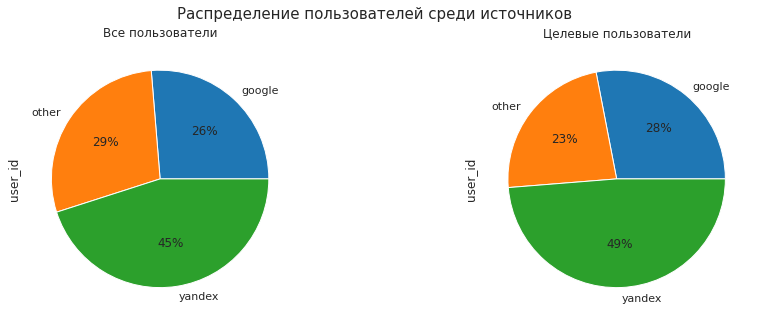

In [79]:
# строим диаграммы распределения весх пользователей и целевых пользователей по источникам

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Распределение пользователей среди источников', fontsize=15)

data.groupby('source')['user_id'].nunique().plot(ax=axs[0], kind='pie', autopct='%1.0f%%', title='Все пользователи')
data_target_all_events.groupby('source')['user_id'].nunique()\
.plot(ax=axs[1], kind='pie', autopct='%1.0f%%' , title='Целевые пользователи')

plt.show()

**Выводы по графикам:**

* Яндекс является явным лидером среди источников загрузки приложения;
* Среди целевых пользователей Яндекс занимает долю 49%, гугл - 28%, другие источники - 23%.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="analysis_12"></a> 
### Выводы

* За изучаемый период 07.10.2019 - 03.11.2019 приложением воспользовалось 4 293 уникальных пользователя.
* Пользователи осуществили 73 097 действий.
* Всего было произведено 7 817 сессий со средней длительностью (значение медианы) 12 минут.
* По набору действий сформировано 128 типов сессий, которые осуществляли пользователи.
* ТОП3 типов сессий по количеству:

    - **1** **tips_show** = 286 сессий с конверсией / 1 685 сессий без конверсии / **конверсия = 15%**
    - **27** **photos_show** = 107 сессий с конверсией / 861 сессия без конверсии / **конверсия = 4%**
    - **33** **map + tips_show** = 173 сессии с конверсией / 655 сессий без конверсии / **конверсия = 21%**

* Достаточно мало пользователей обращаются внимание на рекомендованные объявления, хотя очень зря, так как нажав на рекомендованное объявление в 77% случаев пользователи смотрять контакты, что говорит о хорошей системе рекомендованных объявлений, возможно их слишком много. 25% от количества просмотренных контактов в объявлении, пользователи добавляют его в избранное.

* Пользователи чаще пользуются самостоятельным поиском объвлений на сайте и 20% пользователей смотрят контакты. 63% пользователей добавляют его в избранное от количества просмотренных контактов в объявлении, отличный показатель, значит пользователи точно находят что искали и 33% пользователй звонят по номеру телефона в добавленных в избранное объявлениях.

* В отношении целевого действия *contacts_show* всех пользователей можно разделить на 3 группы:

    - **не целевые** пользователи - пользователи, которые не осуществили целевого действия - составляют большинство - **77%** от общего количества (**3 312 пользователей - 46 479 действий**)
    - **целевые активные** пользователи - пользователи, которые совершили целевое действие более 8 раз за изучаемый период - составляют меньшинство - **2,5% (103 пользователя - 8 453 действия)**
    - **целевые базовые** пользователи - пользователи, которые совершили целевое действие менее 8 раз за изучаемый период - составляют **20,5% (878 пользователей - 18 165 действий)**


* **модель поведения целевого активного пользователя** - 4,5 раза заходит в приложение на протяжении 28 дней, длительность сессии составляет порядка 1 часа, совершает порядка 79 действий, из них: 20 целевых действий просмотра контактов, 43 раза просматривает рекомендованные объявления, 4 раза просматривает карту и 3 раза просматривает фотографии.

**ТОП 5** действий в группе **активных пользователей**:
1. tips_show
2. **cotacts-show**
3. map
4. photos_show
5. search_1

* **модель поведения целевого базового пользователя** - 2 раза заходит в приложение на протяжении 28 дней, длительность сессии составляет порядка 15 минут, совершает всего порядка 15 действий, из них: 2,5 целевых действия просмотра контактов, 9 раз просматривает рекомендованные объявления, 3,5 раза просматривает фотографии и 1,5 раза открывает рекламу. Каждый второй загрузил приложение из Яндекса.

**ТОП 5** действий в группе **базовых пользователей**:
1. tips_show
2. photos_show
3. **cotacts-show**
4. advert_open
5. search_1

* **модель поведения нецелевого пользователя** - 1,6 раза заходит в приложение на протяжении 28 дней, длительность сессии составляет порядка 10 минут, совершает всего порядка 14 действий, из них: 8 раз просматривает рекомендованные объявления, 1,8 раза просматривает фотографии и 1,4 раза открывает рекламу, 0,8 раз просматривает карту и 0,7 раз запускает поиск 1. Каждый второй загрузил приложение из Яндекса.

**ТОП 5** действий в группе **нецелевых пользователей**:
1. tips_show
2. photos_show
3. advert_open
4. map
5. search_1

* активные пользователи ожидаемо чаще пользуются приложением и просматривают контакты;
* модели поведения базовых и нецелевых пользователей достаточно близки; в обеих группах пользователи кроме просмотра карт и фотографий, также обращаются к рекламным объявлениям и первому поиску;
* самым активным днем недели по совершению целевого действия является четверг;
* пользователи достаточно равномерно распределяются по дням.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="target_event"></a> 
## Анализ влияния событий на совершение целевого события

In [80]:
# заменяем пропущенные значения на 0,
# исключаем информацию о действиях tips_show
# преобразуем данные колонки contacts_show таблицы data_all_users
# в бинарный признак 0_1

data_all_users_progn = data_all_users
data_all_users_progn.fillna(0, inplace = True)
data_all_users_progn.loc[(data_all_users_progn.contacts_show > 0), 'contacts_show'] = 1
display(data_all_users_progn['contacts_show'].value_counts())

0.0    3312
1.0     981
Name: contacts_show, dtype: int64

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="corr"></a> 
### Матрица корреляций

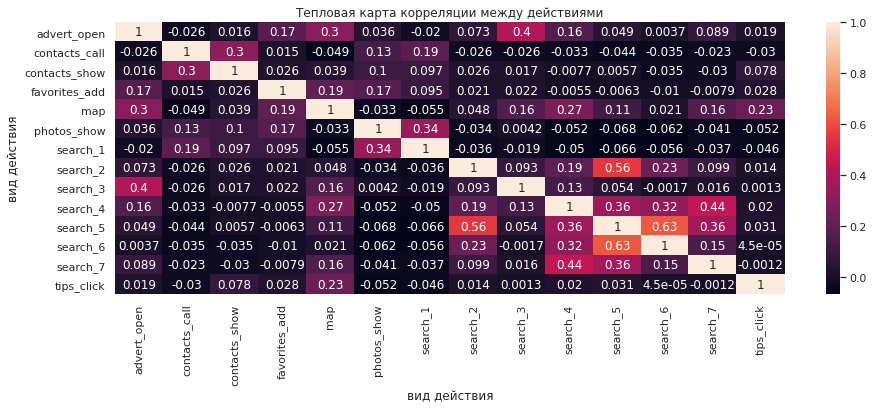

In [81]:
# строим матрицу корреляций и тепловую карту
# используем данные без учета действия tips_show

cm = data_all_users_progn.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(data = cm, annot = True)
plt.title('Тепловая карта корреляции между действиями')
plt.xlabel('вид действия')
plt.ylabel('вид действия')
plt.show()

**Выводы по графику:**

* Корреляционный анализ с помощью матрицы корреляций не выявил сильного взаимодействия между параметрами (видами действий). 
* Максимальное значение коэффициента корреляции равно 0,63 между поисковыми действиями search_5 и search_6, которые в данном случае не нсут конкретной смысловой нагрузки и не позволяют нам интерпретировать действия пользователей. Значения коэффициента корреляции меньше +0.8 или больше -0.8 не считаются значимыми.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="ML"></a> 
### Построение модели прогнозирования совершения целевого действия

**Формирование валидационного множества и стандартизация**

In [82]:
# делим данные на признаки (матрица X) и целевую переменную (y)

X = data_all_users_progn.drop('contacts_show', axis=1)
y = data_all_users_progn['contacts_show']

# разделяем модель на обучающую и валидационную выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
# стандартизируем данные
# обучаем StandartScaler на обучающей выборке

scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**Выводы:**

* Так как целевая переменная не имеет временной привязки валидационное множество сформировано случайным образом в пропорции 20% х 80%.
* Данные обучающей и валидационной выборок стандартизированы.

**Обучение модели на обучающей выборке и прогноз**

**Логистическая регрессия**

In [84]:
# задаем алгоритм для модели логистической регрессии

lr_model = LogisticRegression(random_state=0, solver='liblinear')

# обучаем модель
lr_model.fit(X_train_st, y_train)

# делаем прогноз
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# выводим метрики
print("Предсказанное моделью кол-во целевых действий:", lr_predictions.sum())

Предсказанное моделью кол-во целевых действий: 42.0


**Случайный лес**

In [85]:
# задаем алгоритм для модели на основе алгоритма случайного леса

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0 )

# обучаем модель случайного леса
rf_model.fit(X_train_st, y_train)

# делаем прогноз
rf_predictions = rf_model.predict(X_test_st)

# выводим метрики
print("Предсказанное моделью кол-во целевых действий:", rf_predictions.sum())

Предсказанное моделью кол-во целевых действий: 80.0


In [86]:
# выводим значения весов признаков, присвоенные моделью

importances = rf_model.feature_importances_
feature_list = list(X_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
display(feature_results)

feature  importance
0   contacts_call    0.353420
1     photos_show    0.137864
2        search_1    0.087328
3     advert_open    0.085889
4             map    0.082409
5   favorites_add    0.057972
6      tips_click    0.055428
7        search_5    0.035498
8        search_4    0.027702
9        search_3    0.023942
10       search_6    0.021506
11       search_2    0.019201
12       search_7    0.011841

In [87]:
# выводим значения весов признаков, присвоенные моделью

importances = rf_model.feature_importances_
feature_list = list(X_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
display(feature_results)

feature  importance
0   contacts_call    0.353420
1     photos_show    0.137864
2        search_1    0.087328
3     advert_open    0.085889
4             map    0.082409
5   favorites_add    0.057972
6      tips_click    0.055428
7        search_5    0.035498
8        search_4    0.027702
9        search_3    0.023942
10       search_6    0.021506
11       search_2    0.019201
12       search_7    0.011841

**Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке**

In [88]:
# выводим метрики для полученного прогноза по модели логистической регрессии

print('Метрики при автоматическом прогнозе по модели логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Метрики при автоматическом прогнозе по модели логистической регрессии
Accuracy: 0.80
Precision: 0.93
Recall: 0.19


In [89]:
# выводим метрики для полученного прогноза по модели случайного леса

print('Метрики при автоматическом прогнозе по модели случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики при автоматическом прогнозе по модели случайного леса
Accuracy: 0.78
Precision: 0.65
Recall: 0.25


Сравнение метрик обученных моделей показывает, что:

* **ACCURACY** - логистическая регрессия показала большую долю правильных ответов, чем случайный лес - 80% vs 78%. Логистическая регрессия предсказала 42 целевых действий, случайный лес - 80. Очевидно, что случайный лес ведет себя более позитивно по отношению к результату и слабее оценивает взаимосвязь между признаками.

* **PRECISION** - доля правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом, у логистической регрессии оказалась выше, чем у случайного леса: 93% vs 65%. Метрика показывает, что у логистической регрессии кол-во ошибочно положительных оценок существенно меньше.

* **RECALL** - метрика показала самые низкие результаты. Доля правильно найденных положительных объектов среди всех объектов положительного класса у логистической регрессии оказалась ниже, чем у случайного леса: 19% vs 25%. Метрика показывает, что обе модели выдают большое кол-во ошибочно негативных результатов, что очевидно является следствием слабой корреляции между признаками.

**Выводы:**

* Корреляционный анализ и результаты применения моделей, метрики показали слабую взаимосвязь между признаками.
* Значения весов, присвоенные признакам моделью случайного леса, распределились в рейтинг, который совпал с результатами исследовательского анализа данных. В ТОП 5 вошли:
1. contacts_call - 0.353420
2. photos_show - 0.137864
3. search_1 - 0.087328
4. advert_open - 0.085889
5. map - 0.082409
6. favorites_add - 0.057972
* На текущем наборе данных для прогнозирования рекомендуется применять модель логистической регрессии

**Результаты оценки модели, разными метриками, дали высокие результаты, что свидетельствует о возможности ее использования:**
- в дальнейшией аналитической работе по оценке влияния событий на совершение целевого действия;
- прогнозировании поведенческих моделей пользователей;
- принтяии управленческих решений на основе полученных данных.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="stats"></a> 
## Проверка статистических гипотез

<a id="stats_1"></a> 
### Гипотеза № 1

Одни пользователи пришли в приложение из источнкиа yandex, другие из источника google.

**Гипотеза:** конверсии в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex, и пользователями, совершившими установки, из источника google различаются.

Сформируем датафрейм и проверим гипотезу о наличии статистически значимой разницы с помощью z-критерия:

In [90]:
yandex = data.query('source =="yandex" and event_name == "contacts_show"')
google = data.query('source =="google" and event_name == "contacts_show"')

In [91]:
users_count_by_source = data.query('source !="other"').groupby('source')['user_id'].nunique()

In [92]:
users_by_events = data.query('event_name == "contacts_show" and source !="other"').pivot_table(index='source',columns='event_name', values='user_id', aggfunc='nunique').reset_index()
users_by_events
users_by_events['user_count'] = users_by_events['source'].apply(lambda x: users_count_by_source.loc[x])
users_by_events = users_by_events.set_index('source')
users_by_events.columns = ['contacts_show', 'user_count']

In [93]:
def st_test(part0, part1, total0, total1):  
    alpha = .05 
    p1 = part0 / total0 
    p2 = part1 / total1 
    p_combined = (part0 + part1) / (total0 + total1) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total0 + 1/total1))
    distr = stats.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

**Формулировка гипотез**

Для проверки статистической значимости различий конверсии между группами формулируем гипотезы:

* Гипотеза 0 = 'отличие между группами отсутствует & выявленная разница не является статистически достоверной'

* Гипотеза 1 = 'существует отличие между группами & выявленная разница является статистически достоверной'

In [94]:
AA_pivot = pd.DataFrame(columns=['Группа_1', 'Группа_2', 'Этап', 'p_alpha', 'p_value', 'Результат'])

result_options = ["Отвергаем нулевую гипотезу - между долями есть статзначимая разница",
                  "Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными"]

group_1 = 'google'
current_row = users_by_events.loc[users_by_events.index[0]]
group_2 = 'yandex'
for event_number in range(1):
    curr_event = users_by_events.columns[event_number]
    p_value_result = st_test(current_row[curr_event], 
                                   users_by_events[curr_event][users_by_events.index[1]],
                                   current_row['user_count'],
                                   users_by_events['user_count'][users_by_events.index[1]]
                           )
    new_row = {'Группа_1': group_1,
               'Группа_2': group_2,
               'Этап': users_by_events.columns[event_number],
               'p_alpha': 0.05,
               'p_value': round(p_value_result, 3),
               'Результат': result_options[p_value_result >= 0.05]}
    AA_pivot = AA_pivot.append([new_row])

AA_pivot.index = range(len(AA_pivot))
AA_pivot

Группа_1 Группа_2           Этап  p_alpha  p_value  \
0   google   yandex  contacts_show     0.05    0.824   

                                                                       Результат  
0  Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

**Вывод:**

**Статистической разницы** конверсии в просмотры контактов между пользователями зарегистрировавшимся с yandex и google  **нет**.

<a id="stats_2"></a> 
### Гипотеза № 2

Одни пользователи совершают действия tips_show и tips_click, другие - только tips_show.

**Гипотеза:** конверсия в просмотры контактов различается у этих двух групп

**Расчет статистической значимости различий в конверсии м/у группами**

**Формирование данных группа А**

In [95]:
# формируем данные по группе А - пользователи совершили действия:
# tips_show, tips_click

# делаем выборку из матрицы типов сессий по признаку tips_show == да и tips_click == да

sampleA1 = data_session_conv4[(data_session_conv4['tips_show'] == 'да') & (data_session_conv4['tips_click'] == 'да')]

display(sampleA1)

session_type_id advert_open contacts_call favorites_add  map photos_show  \
3                  3         нет           нет           нет  нет         нет   
6                  6         нет           нет           нет  нет         нет   
10                10         нет           нет           нет  нет         нет   
12                12         нет           нет           нет  нет         нет   
14                14         нет           нет           нет  нет         нет   
22                22         нет           нет           нет  нет         нет   
25                25         нет           нет           нет  нет         нет   
29                29         нет           нет           нет  нет          да   
31                31         нет           нет           нет  нет          да   
35                35         нет           нет           нет   да         нет   
40                40         нет           нет           нет   да         нет   
43                43         нет           нет           нет   да         нет   
47                47         нет           нет           нет   да         нет   
50                50         нет           нет           нет   да         нет   
52                52         нет           нет           нет   да         нет   
56                56         нет           нет            да  нет         нет   
57                57         нет           нет            да  нет         нет   
65                65         нет           нет            да   да         нет   
77                77          да           нет           нет  нет         нет   
86                86          да           нет           нет   да         нет   
89                89          да           нет           нет   да         нет   
92                92          да           нет           нет   да         нет   
97                97          да           нет           нет   да         нет   
110              110          да           нет            да  нет         нет   
116              116          да           нет            да   да         нет   

    search_1 search_2 search_3 search_4 search_5 search_6 search_7 tips_click  \
3        нет      нет      нет      нет      нет      нет      нет         да   
6        нет      нет      нет      нет       да      нет      нет         да   
10       нет      нет      нет      нет       да       да      нет         да   
12       нет      нет      нет       да      нет      нет      нет         да   
14       нет      нет      нет       да       да      нет      нет         да   
22       нет       да      нет       да       да      нет      нет         да   
25       нет       да       да      нет       да      нет      нет         да   
29       нет      нет      нет      нет      нет      нет      нет         да   
31        да      нет      нет      нет      нет      нет      нет         да   
35       нет      нет      нет      нет      нет      нет      нет         да   
40       нет      нет      нет       да       да      нет      нет         да   
43       нет      нет      нет       да       да       да      нет         да   
47       нет      нет       да       да      нет       да      нет         да   
50       нет       да      нет       да      нет      нет      нет         да   
52       нет       да      нет       да       да       да      нет         да   
56       нет      нет      нет      нет      нет      нет      нет         да   
57       нет      нет      нет      нет       да      нет      нет         да   
65       нет      нет      нет      нет      нет      нет      нет         да   
77       нет      нет      нет      нет      нет      нет      нет         да   
86       нет      нет      нет      нет      нет      нет      нет         да   
89       нет      нет      нет      нет       да      нет      нет         да   
92       нет      нет      нет       да      нет      нет      нет         да   
97       нет      нет       да     

In [96]:
# выводим информацию о кол-ве действий в группе А

print('Кол-во действий в группе А всего (trials):', sampleA1['session_total'].sum())
print()
print('Из них кол-во действий в группе А c конверсий (success):', sampleA1['conversion_yes'].sum())
print()
print('Конверсия в группе А:', (sampleA1['conversion_yes'].sum() / sampleA1['session_total'].sum()).round(5))

Кол-во действий в группе А всего (trials): 321.0

Из них кол-во действий в группе А c конверсий (success): 89.0

Конверсия в группе А: 0.27726


**Формирование данных группа В**

In [97]:
# формируем данные по группе B - пользователи совершили действия:
# tips_show

# делаем выборку из матрицы типов сессий по признаку tips_show == да

sampleB1 = data_session_conv4[(data_session_conv4['tips_show'] == 'да') & (data_session_conv4['tips_click'] == 'нет')]

display(sampleB1)

session_type_id advert_open contacts_call favorites_add  map photos_show  \
1                  1         нет           нет           нет  нет         нет   
5                  5         нет           нет           нет  нет         нет   
8                  8         нет           нет           нет  нет         нет   
9                  9         нет           нет           нет  нет         нет   
11                11         нет           нет           нет  нет         нет   
..               ...         ...           ...           ...  ...         ...   
117              117          да           нет            да   да         нет   
118              118          да           нет            да   да         нет   
119              119          да           нет            да   да         нет   
120              120          да           нет            да   да         нет   
121              121          да           нет            да   да         нет   

    search_1 search_2 search_3 search_4 search_5 search_6 search_7 tips_click  \
1        нет      нет      нет      нет      нет      нет      нет        нет   
5        нет      нет      нет      нет       да      нет      нет        нет   
8        нет      нет      нет      нет       да      нет       да        нет   
9        нет      нет      нет      нет       да       да      нет        нет   
11       нет      нет      нет       да      нет      нет      нет        нет   
..       ...      ...      ...      ...      ...      ...      ...        ...   
117      нет      нет       да      нет       да      нет      нет        нет   
118      нет       да      нет      нет       да       да      нет        нет   
119      нет       да      нет       да       да       да      нет        нет   
120      нет       да       да      нет       да      нет       да        нет   
121      нет       да       да       да       да      нет      нет        нет   

    tips_show  conversion_yes  conversion_no  session_total  \
1          да           286.0         1685.0         1971.0   
5          да             6.0           33.0           39.0   
8          да             5.0           25.0           30.0   
9          да             6.0           68.0           74.0   
11         да             2.0            6.0            8.0   
..        ...             ...            ...            ...   
117        да             1.0            0.0            1.0   
118        да             1.0            0.0            1.0   
119        да             1.0            1.0            2.0   
120        да             1.0            0.0            1.0   
121        да             1.0            2.0            3.0   

     session_conversion  
1                  0.15  
5                  0.15  
8                  0.17  
9                  0.08  
11                 0.25  
..                  ...  
117                1.00  
118                1.00  
119                0.50  
120                1.00  
121                0.33  

[62 rows x 19 columns]

In [98]:
# выводим информацию о кол-ве действий в группе B

print('Кол-во действий в группе B всего (trials):', sampleB1['session_total'].sum())
print()
print('Из них кол-во действий в группе B c конверсий (success):', sampleB1['conversion_yes'].sum())
print()
print('Конверсия в группе B:', (sampleB1['conversion_yes'].sum() / sampleB1['session_total'].sum()).round(5))

Кол-во действий в группе B всего (trials): 4137.0

Из них кол-во действий в группе B c конверсий (success): 653.0

Конверсия в группе B: 0.15784


**Функция определения статистической значимости**

In [99]:
# создаем функцию определения статистической значимости  различий в 2-х группах

def stat_sign_chek(successes, trials):
    alpha = 0.05 # определяем критический уровень стат значимости
    p1 = successes[0] / trials[0] # считаем пропорцию успехов в первой группе
    p2 = successes[1] / trials[1] # считаем пропорцию успехов во второй группе
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1]) # считаем пропорцию успехов в комбинированном датасете
    difference = p1 - p2 # определяем разницу пропорций в датасетоах
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])) # считаем статистику
                                                                                                    # в стандартных отклонениях
                                                                                                    # стандартного нормального
                                                                                                    # распределения
    distr = st.norm(0, 1) # задаем стандартное нормальное распределение
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    if (p_value < alpha):
        print('Отвергаем нулевыую гипотезу: между группами есть значимая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными.')
       
    return p_value    

**Формулировка гипотез**

Для проверки статистической значимости различий конверсии между группами формулируем гипотезы:

* Гипотеза 0 = 'отличие между группами отсутствует & выявленная разница не является статистически достоверной'

* Гипотеза 1 = 'существует отличие между группами & выявленная разница является статистически достоверной'

In [100]:
# производим проверку статистической значимости разницы результатов

trials = np.array([sampleA1['session_total'].sum(), sampleB1['session_total'].sum()])
success = np.array([sampleA1['conversion_yes'].sum(), sampleB1['conversion_yes'].sum()])
    
stat_sign_chek(success, trials)

Отвергаем нулевыую гипотезу: между группами есть значимая разница.


3.1428077251760556e-08

**Выводы**

* Проверка **статистической значимости** различий конверсии между группами подтвердила, что существует отличие между группами & выявленная разница является статистически достоверной;
* **p-value**, полученное в ходе проверки, стремится к 0 и позволяет **отвергнуть нулевую гипотезу о равенстве групп**;
* пользователи, которые заходят в рекомендованные объявления, чаще совершают целевое действие просмотра контактов.

<a id='table_of_contents'></a>
[Содержание](#table_of_contents)

<a id="conclusions"></a> 
## Выводы и рекомендации

* Анализ поведения пользователей в мобильном приложении **"Ненужные вещи"** на основании данных, предоставленных за период с **7 октября 2019 г. по 3 ноября 2019 г. (всего - 28 дней)**, показал, что в среднем в приложение заходят **280 - 290** пользователей в день, которые совершают **1** сессию.
* **Характер** распределения данных по датам, дням недели и событиям достаточно **ровный**, аномалий не выявлено.
* Общий уровень **конверсии** в целевое действие, обозначенное в иследовании как contacts_show (просмотр контактов), достаточно **низкий** - не целевые пользователи - пользователи, которые не осуществили целевого действия - составляют большинство - 77% от общего количества (3 312 пользователей - 46 479 действий).
* Достаточно мало пользователей обращаются внимание на рекомендованные объявления, хотя очень зря, так как нажав на рекомендованное объявление в 77% случаев пользователи смотрять контакты, что говорит о хорошей системе рекомендованных объявлений, возможно их слишком много. 25% от количества просмотренных контактов в объявлении, пользователи добавляют его в избранное.
* Пользователи чаще пользуются самостоятельным поиском объвлений на сайте и 20% пользователей смотрят контакты. 63% пользователей добавляют его в избранное от количества просмотренных контактов в объявлении, отличный показатель, значит пользователи точно находят что искали и 33% пользователй звонят по номеру телефона в добавленных в избранное объявлениях.
* Среди источников **загрузки** приложения доминирует **Яндекс**, но доли источников в общей группе пользователей и в целевой группе приблизительно равны, соответственно можно предположить, что источник загрузки **не оказывает влияния** на осуществление целевого действия.
* В ходе исследования было выделено и описано **3 ключевых профиля** пользователей:


    - целевой активный пользователь - 2,5% пользователей - четкое представление об искомом предмете + высокая мотивация;
    - целевой базовый пользователь - 20,5% - потребность в дополнительной информации для принятия решения (фото, реклама, поиск), сомнения;
    - нецелевой пользователь - 77% - потребность в дополнительной информации для принятия решения (фото, реклама, карта, поиск), сомнения.
    
    
* Для совершенствования продукта предлагается держать фокус на базовую и нецелевую группы.
* Среди доступного набора действий выявлено 128 паттернов поведения пользователей, или типов сессий.
* С точки зрения влияния на бизнес составлен рейтинг ТОП10 типов, которые составляют основную массу с точки зрения количества, но при этом имеют достаточно невысокую конверсию
* Кроме типа *tips_show* рекомендуется обратить внимание на типы сессий:


    - 33 map + tips_show = 173 сессии с конверсией / 655 сессий без конверсии / конверсия = 21%;
    - 3 tips_click + tips_show = 44 сессии с конверсией / 141 сессия без конверсии / конверсия = 24%;


При достаточно высоком объеме у них конверсия выше, чем у остальных участников ТОП10. Возможно небольшие улучшения смогут быстро дать результат по росту конверсии в этих типах сессий.

* Очевидно, что рекомендованные объявления являются информационным ядром продукта. Рекомендуется разработать метрику по оценке качества этого параметра, отслеживать ее на регулярной основе и постоянно работать над улучшением.

* По остальным действиям базовая и нецелевая группы показали схожее поведение:


    - photos_show / базовая = 18% действий / нецелевая - 13% действий;
    - advert_open / базовая = 7% действий / нецелевая - 10% действий;
    - map / базовая = 4% действий / нецелевая - 6% действий;
    - search_1 / базовая = 6% действий / нецелевая - 5% действий.
    
    
* Математическая модель **случайного леса**, обученная для прогноза совершения целевого действия также выделила в ТОП по важности весов признаки:


    - contacts_call - 0.353420;
    - photos_show - 0.137864;
    - search_1 - 0.087328;
    - advert_open - 0.085889;
    - map - 0.082409;
    - favorites_add - 0.057972.


* Анализ гипотезы о разности конверсий в группах пользователей показал, что действительно конверсия в группе пользователей, которые осуществляют просмотр рекомендованных объявлений и заход в них, выше, чем в группе пользователей, которые просто просматривают рекомендованные объявления.

* Анализ гипотезы о разности конверсий в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex, и пользователя, совершившими установки, из источника google показал, что статистической разницы конверсии в просмотры контактов между пользователями зарегистрировавшимся с yandex и google - нет, источник никак не влияет на просмоторы целевого события.
* Корреляционный анализ показал отсутствие сильных связей между параметрами. Соответственно влияние на 1 параметр с точки зрения улучшения не вызовет автоматических улучшений по другим параметрам и требуется работа с каждым действием отдельно.


**В качестве рекомендаций по повышению конверсии предлагается:**

1. Сфокусироваться на параметрах: photos_show, map, search_1, advert_open.
2. Провести исследование с пользователями для составления списка важных для них метрик относительно каждого из этих параметров, которые позволяют максимально быстро и просто составить представление о предлагаемом продукте и ответить на вопрос насколько он отвечает ожиданиям.
3. Провести анализ параметров в разрезе полученных результатов исследования.
4. Если потребуется по результатам анализа разработать и внедрить улучшения.